In [42]:
import os
import pandas as pd
import numpy as np
from scipy.spatial.distance import jensenshannon as jsd
import glob
import seaborn as sns
import matplotlib.pylab as plt
import seaborn as sns
from scipy.stats import wasserstein_distance



Connected to base (Python 3.10.6)

In [2]:
sns.set_theme()

In [47]:
npy_files = glob.glob("/Users/celinebalaa/Desktop/thesis/tmp/gliph_signature_downsampled/data/results_p_infer/signature/*.npy")

In [49]:
npy_files

['/Users/celinebalaa/Desktop/thesis/tmp/gliph_signature_downsampled/data/results_p_infer/signature/BLN_nTregs_signature_p_infer.npy',
 '/Users/celinebalaa/Desktop/thesis/tmp/gliph_signature_downsampled/data/results_p_infer/signature/RLN_nTregs_signature_p_infer.npy',
 '/Users/celinebalaa/Desktop/thesis/tmp/gliph_signature_downsampled/data/results_p_infer/signature/PLN_amTregs_signature_p_infer.npy',
 '/Users/celinebalaa/Desktop/thesis/tmp/gliph_signature_downsampled/data/results_p_infer/signature/RLN_Teff_signature_p_infer.npy',
 '/Users/celinebalaa/Desktop/thesis/tmp/gliph_signature_downsampled/data/results_p_infer/signature/RLN_CD8_signature_p_infer.npy',
 '/Users/celinebalaa/Desktop/thesis/tmp/gliph_signature_downsampled/data/results_p_infer/signature/PLN_Teff_signature_p_infer.npy',
 '/Users/celinebalaa/Desktop/thesis/tmp/gliph_signature_downsampled/data/results_p_infer/signature/PLN_nTregs_signature_p_infer.npy',
 '/Users/celinebalaa/Desktop/thesis/tmp/gliph_signature_downsampled/

In [50]:

names = [file.split('_p_infer.npy')[0] for file in npy_files]


In [51]:
# Load each .npy file
data_dict = {}
for file in npy_files:
    data = np.load(file)
    data_dict[file] = data
    print(f"Loaded {file}")
    

Loaded /Users/celinebalaa/Desktop/thesis/tmp/gliph_signature_downsampled/data/results_p_infer/signature/BLN_nTregs_signature_p_infer.npy
Loaded /Users/celinebalaa/Desktop/thesis/tmp/gliph_signature_downsampled/data/results_p_infer/signature/RLN_nTregs_signature_p_infer.npy
Loaded /Users/celinebalaa/Desktop/thesis/tmp/gliph_signature_downsampled/data/results_p_infer/signature/PLN_amTregs_signature_p_infer.npy
Loaded /Users/celinebalaa/Desktop/thesis/tmp/gliph_signature_downsampled/data/results_p_infer/signature/RLN_Teff_signature_p_infer.npy
Loaded /Users/celinebalaa/Desktop/thesis/tmp/gliph_signature_downsampled/data/results_p_infer/signature/RLN_CD8_signature_p_infer.npy
Loaded /Users/celinebalaa/Desktop/thesis/tmp/gliph_signature_downsampled/data/results_p_infer/signature/PLN_Teff_signature_p_infer.npy
Loaded /Users/celinebalaa/Desktop/thesis/tmp/gliph_signature_downsampled/data/results_p_infer/signature/PLN_nTregs_signature_p_infer.npy
Loaded /Users/celinebalaa/Desktop/thesis/tmp/gl

In [52]:
lengths = {key: len(value) for key, value in data_dict.items()} #similar to apply

In [53]:
lengths

{'/Users/celinebalaa/Desktop/thesis/tmp/gliph_signature_downsampled/data/results_p_infer/signature/BLN_nTregs_signature_p_infer.npy': 306,
 '/Users/celinebalaa/Desktop/thesis/tmp/gliph_signature_downsampled/data/results_p_infer/signature/RLN_nTregs_signature_p_infer.npy': 100,
 '/Users/celinebalaa/Desktop/thesis/tmp/gliph_signature_downsampled/data/results_p_infer/signature/PLN_amTregs_signature_p_infer.npy': 376,
 '/Users/celinebalaa/Desktop/thesis/tmp/gliph_signature_downsampled/data/results_p_infer/signature/RLN_Teff_signature_p_infer.npy': 226,
 '/Users/celinebalaa/Desktop/thesis/tmp/gliph_signature_downsampled/data/results_p_infer/signature/RLN_CD8_signature_p_infer.npy': 91,
 '/Users/celinebalaa/Desktop/thesis/tmp/gliph_signature_downsampled/data/results_p_infer/signature/PLN_Teff_signature_p_infer.npy': 164,
 '/Users/celinebalaa/Desktop/thesis/tmp/gliph_signature_downsampled/data/results_p_infer/signature/PLN_nTregs_signature_p_infer.npy': 503,
 '/Users/celinebalaa/Desktop/thesi

In [54]:
[len (x) for x in data_dict.values()]

[306, 100, 376, 226, 91, 164, 503, 359, 26, 122, 328]

In [55]:
max_prob = max([len (x) for x in data_dict.values()])

In [56]:
max_prob

503

In [57]:
padded_data = {}

In [58]:
for filename, prob in data_dict.items():
    if len(prob) < max_prob:
        padded_data[filename] = np.pad(prob, (0, max_prob - len(prob)), 'constant')
    else:
        padded_data[filename] = prob 

In [59]:
js_distances = np.array([[jsd(value1, value2) for value1 in padded_data.values()]
                        for value2 in padded_data.values()])
js_df = pd.DataFrame(js_distances, index=names, columns=names)


In [60]:
metadata = pd.DataFrame()

In [61]:
names

['/Users/celinebalaa/Desktop/thesis/tmp/gliph_signature_downsampled/data/results_p_infer/signature/BLN_nTregs_signature',
 '/Users/celinebalaa/Desktop/thesis/tmp/gliph_signature_downsampled/data/results_p_infer/signature/RLN_nTregs_signature',
 '/Users/celinebalaa/Desktop/thesis/tmp/gliph_signature_downsampled/data/results_p_infer/signature/PLN_amTregs_signature',
 '/Users/celinebalaa/Desktop/thesis/tmp/gliph_signature_downsampled/data/results_p_infer/signature/RLN_Teff_signature',
 '/Users/celinebalaa/Desktop/thesis/tmp/gliph_signature_downsampled/data/results_p_infer/signature/RLN_CD8_signature',
 '/Users/celinebalaa/Desktop/thesis/tmp/gliph_signature_downsampled/data/results_p_infer/signature/PLN_Teff_signature',
 '/Users/celinebalaa/Desktop/thesis/tmp/gliph_signature_downsampled/data/results_p_infer/signature/PLN_nTregs_signature',
 '/Users/celinebalaa/Desktop/thesis/tmp/gliph_signature_downsampled/data/results_p_infer/signature/BLN_amTregs_signature',
 '/Users/celinebalaa/Desktop/

In [62]:

names = [os.path.basename(file).split('_p_infer.npy')[0] for file in npy_files]


In [63]:
names

['BLN_nTregs_signature',
 'RLN_nTregs_signature',
 'PLN_amTregs_signature',
 'RLN_Teff_signature',
 'RLN_CD8_signature',
 'PLN_Teff_signature',
 'PLN_nTregs_signature',
 'BLN_amTregs_signature',
 'PLN_CD8_signature',
 'RLN_amTregs_signature',
 'BLN_CD8_signature']

In [64]:
metadata['sample'] = names

In [65]:
metadata

sample
0    BLN_nTregs_signature
1    RLN_nTregs_signature
2   PLN_amTregs_signature
3      RLN_Teff_signature
4       RLN_CD8_signature
5      PLN_Teff_signature
6    PLN_nTregs_signature
7   BLN_amTregs_signature
8       PLN_CD8_signature
9   RLN_amTregs_signature
10      BLN_CD8_signature

In [66]:
metadata['sample'].apply(lambda x: x.split("_")[0])

0     BLN
1     RLN
2     PLN
3     RLN
4     RLN
5     PLN
6     PLN
7     BLN
8     PLN
9     RLN
10    BLN
Name: sample, dtype: object

In [67]:
metadata['sample'].str.split("_").str[0]

0     BLN
1     RLN
2     PLN
3     RLN
4     RLN
5     PLN
6     PLN
7     BLN
8     PLN
9     RLN
10    BLN
Name: sample, dtype: object

In [68]:
metadata['organ'] = metadata['sample'].apply(lambda x: x.split("_")[0])

In [69]:
metadata['cell_pop'] = metadata['sample'].apply(lambda x: x.split("_")[1])

In [70]:
metadata['condition'] = metadata['sample'].apply(lambda x: x.split("_")[2])

In [71]:
metadata

sample organ cell_pop  condition
0    BLN_nTregs_signature   BLN   nTregs  signature
1    RLN_nTregs_signature   RLN   nTregs  signature
2   PLN_amTregs_signature   PLN  amTregs  signature
3      RLN_Teff_signature   RLN     Teff  signature
4       RLN_CD8_signature   RLN      CD8  signature
5      PLN_Teff_signature   PLN     Teff  signature
6    PLN_nTregs_signature   PLN   nTregs  signature
7   BLN_amTregs_signature   BLN  amTregs  signature
8       PLN_CD8_signature   PLN      CD8  signature
9   RLN_amTregs_signature   RLN  amTregs  signature
10      BLN_CD8_signature   BLN      CD8  signature

In [72]:
multi_index = pd.MultiIndex.from_arrays([metadata['sample'], metadata['cell_pop'], metadata['organ']], names=['index', 'cell_pop', 'organ'])

In [73]:
multi_index

MultiIndex([( 'BLN_nTregs_signature',  'nTregs', 'BLN'),
            ( 'RLN_nTregs_signature',  'nTregs', 'RLN'),
            ('PLN_amTregs_signature', 'amTregs', 'PLN'),
            (   'RLN_Teff_signature',    'Teff', 'RLN'),
            (    'RLN_CD8_signature',     'CD8', 'RLN'),
            (   'PLN_Teff_signature',    'Teff', 'PLN'),
            ( 'PLN_nTregs_signature',  'nTregs', 'PLN'),
            ('BLN_amTregs_signature', 'amTregs', 'BLN'),
            (    'PLN_CD8_signature',     'CD8', 'PLN'),
            ('RLN_amTregs_signature', 'amTregs', 'RLN'),
            (    'BLN_CD8_signature',     'CD8', 'BLN')],
           names=['index', 'cell_pop', 'organ'])

In [74]:
js_df.columns = multi_index

In [75]:
js_df.index=multi_index

In [76]:
js_df

index                                BLN_nTregs_signature  \
cell_pop                                           nTregs   
organ                                                 BLN   
index                 cell_pop organ                        
BLN_nTregs_signature  nTregs   BLN               0.000000   
RLN_nTregs_signature  nTregs   RLN               0.785519   
PLN_amTregs_signature amTregs  PLN               0.729649   
RLN_Teff_signature    Teff     RLN               0.761922   
RLN_CD8_signature     CD8      RLN               0.829149   
PLN_Teff_signature    Teff     PLN               0.783129   
PLN_nTregs_signature  nTregs   PLN               0.754079   
BLN_amTregs_signature amTregs  BLN               0.716032   
PLN_CD8_signature     CD8      PLN               0.831669   
RLN_amTregs_signature amTregs  RLN               0.817779   
BLN_CD8_signature     CD8      BLN               0.746365   

index                                RLN_nTregs_signature  \
cell_pop                                           nTregs   
organ                                                 RLN   
index                 cell_pop organ                        
BLN_nTregs_signature  nTregs   BLN               0.785519   
RLN_nTregs_signature  nTregs   RLN               0.000000   
PLN_amTregs_signature amTregs  PLN               0.792832   
RLN_Teff_signature    Teff     RLN               0.785306   
RLN_CD8_signature     CD8      RLN               0.825469   
PLN_Teff_signature    Teff     PLN               0.819222   
PLN_nTregs_signature  nTregs   PLN               0.800135   
BLN_amTregs_signature amTregs  BLN               0.814729   
PLN_CD8_signature     CD8      PLN               0.832240   
RLN_amTregs_signature amTregs  RLN               0.795355   
BLN_CD8_signature     CD8      BLN               0.807468   

index                                PLN_amTregs_signature RLN_Teff_signature  \
cell_pop                                           amTregs               Teff   
organ                                                  PLN                RLN   
index                 cell_pop organ                                            
BLN_nTregs_signature  nTregs   BLN                0.729649           0.761922   
RLN_nTregs_signature  nTregs   RLN                0.792832           0.785306   
PLN_amTregs_signature amTregs  PLN                0.000000           0.780893   
RLN_Teff_signature    Teff     RLN                0.780893           0.000000   
RLN_CD8_signature     CD8      RLN                0.830249           0.764344   
PLN_Teff_signature    Teff     PLN                0.809306           0.807443   
PLN_nTregs_signature  nTregs   PLN                0.755711           0.777745   
BLN_amTregs_signature amTregs  BLN                0.772519           0.787979   
PLN_CD8_signature     CD8      PLN                0.831588           0.829707   
RLN_amTregs_signature amTregs  RLN                0.825888           0.793551   
BLN_CD8_signature     CD8      BLN                0.754059           0.754381   

index                                RLN_CD8_signature PLN_Teff_signature  \
cell_pop                                           CD8               Teff   
organ                                              RLN                PLN   
index                 cell_pop organ                                        
BLN_nTregs_signature  nTregs   BLN            0.829149           0.783129   
RLN_nTregs_signature  nTregs   RLN            0.825469           0.819222   
PLN_amTregs_signature amTregs  PLN            0.830249           0.809306   
RLN_Teff_signature    Teff     RLN            0.764344           0.807443   
RLN_CD8_signature     CD8      RLN            0.000000           0.824187   
PLN_Teff_signature    Teff     PLN            0.824187           0.000000   
PLN_nTregs_signature  nTregs   PLN            0.817562           0.819437   
BLN_amTregs_signature amTregs  BLN            0.827164           0.796881   
PLN_CD8_signature     CD8   

In [77]:
for prob in padded_data.values():
    print(np.isclose(np.sum(prob), 1.0))

True
True
True
True
True
True
True
True
True
True
True


In [78]:
js_divergence = pd.DataFrame(js_distances**2, index=names, columns=names)


In [79]:
js_divergence

BLN_nTregs_signature  RLN_nTregs_signature  \
BLN_nTregs_signature               0.000000              0.617040   
RLN_nTregs_signature               0.617040              0.000000   
PLN_amTregs_signature              0.532388              0.628582   
RLN_Teff_signature                 0.580526              0.616705   
RLN_CD8_signature                  0.687488              0.681399   
PLN_Teff_signature                 0.613291              0.671125   
PLN_nTregs_signature               0.568635              0.640215   
BLN_amTregs_signature              0.512701              0.663783   
PLN_CD8_signature                  0.691673              0.692624   
RLN_amTregs_signature              0.668762              0.632590   
BLN_CD8_signature                  0.557061              0.652005   

                       PLN_amTregs_signature  RLN_Teff_signature  \
BLN_nTregs_signature                0.532388            0.580526   
RLN_nTregs_signature                0.628582            0.616705   
PLN_amTregs_signature               0.000000            0.609794   
RLN_Teff_signature                  0.609794            0.000000   
RLN_CD8_signature                   0.689314            0.584222   
PLN_Teff_signature                  0.654976            0.651965   
PLN_nTregs_signature                0.571099            0.604887   
BLN_amTregs_signature               0.596786            0.620911   
PLN_CD8_signature                   0.691539            0.688413   
RLN_amTregs_signature               0.682091            0.629723   
BLN_CD8_signature                   0.568604            0.569090   

                       RLN_CD8_signature  PLN_Teff_signature  \
BLN_nTregs_signature            0.687488            0.613291   
RLN_nTregs_signature            0.681399            0.671125   
PLN_amTregs_signature           0.689314            0.654976   
RLN_Teff_signature              0.584222            0.651965   
RLN_CD8_signature               0.000000            0.679285   
PLN_Teff_signature              0.679285            0.000000   
PLN_nTregs_signature            0.668407            0.671477   
BLN_amTregs_signature           0.684201            0.635019   
PLN_CD8_signature               0.685514            0.684781   
RLN_amTregs_signature           0.649278            0.656918   
BLN_CD8_signature               0.678721            0.651902   

                       PLN_nTregs_signature  BLN_amTregs_signature  \
BLN_nTregs_signature               0.568635               0.512701   
RLN_nTregs_signature               0.640215               0.663783   
PLN_amTregs_signature              0.571099               0.596786   
RLN_Teff_signature                 0.604887               0.620911   
RLN_CD8_signature                  0.668407               0.684201   
PLN_Teff_signature                 0.671477               0.635019   
PLN_nTregs_signature               0.000000               0.614486   
BLN_amTregs_signature              0.614486               0.000000   
PLN_CD8_signature                  0.692091               0.690437   
RLN_amTregs_signature              0.668262               0.672530   
BLN_CD8_signature                  0.611864               0.599665   

                       PLN_CD8_signature  RLN_amTregs_signature  \
BLN_nTregs_signature            0.691673               0.668762   
RLN_nTregs_signature            0.692624               0.632590   
PLN_amTregs_signature           0.691539               0.682091   
RLN_Teff_signature              0.688413               0.629723   
RLN_CD8_signature               0.685514               0.649278   
PLN_Teff_signature              0.684781               0.656918   
PLN_nTregs_signature            0.692091               0.668262   
BLN_amTregs_signature           0.690437               0.672530   
PLN_CD8_signature               0.000000               0.692387   
RLN_amTregs_signature           0.692387               0.000000   
BLN_CD8_signature             

In [80]:
js_divergence.columns = multi_index

In [81]:
js_divergence.index = multi_index

In [82]:
# Create a categorical palette to identify the samples
pal = sns.husl_palette(8, s=.45)


In [83]:
#bar metamouse
lut = dict(zip(map(str, metadata['organ']), pal))
# Convert the palette to vectors that will be drawn on the side of the matrix
organs = js_df.columns.get_level_values("organ")
organs_colors = pd.Series(organs, index=js_df.columns).map(lut)


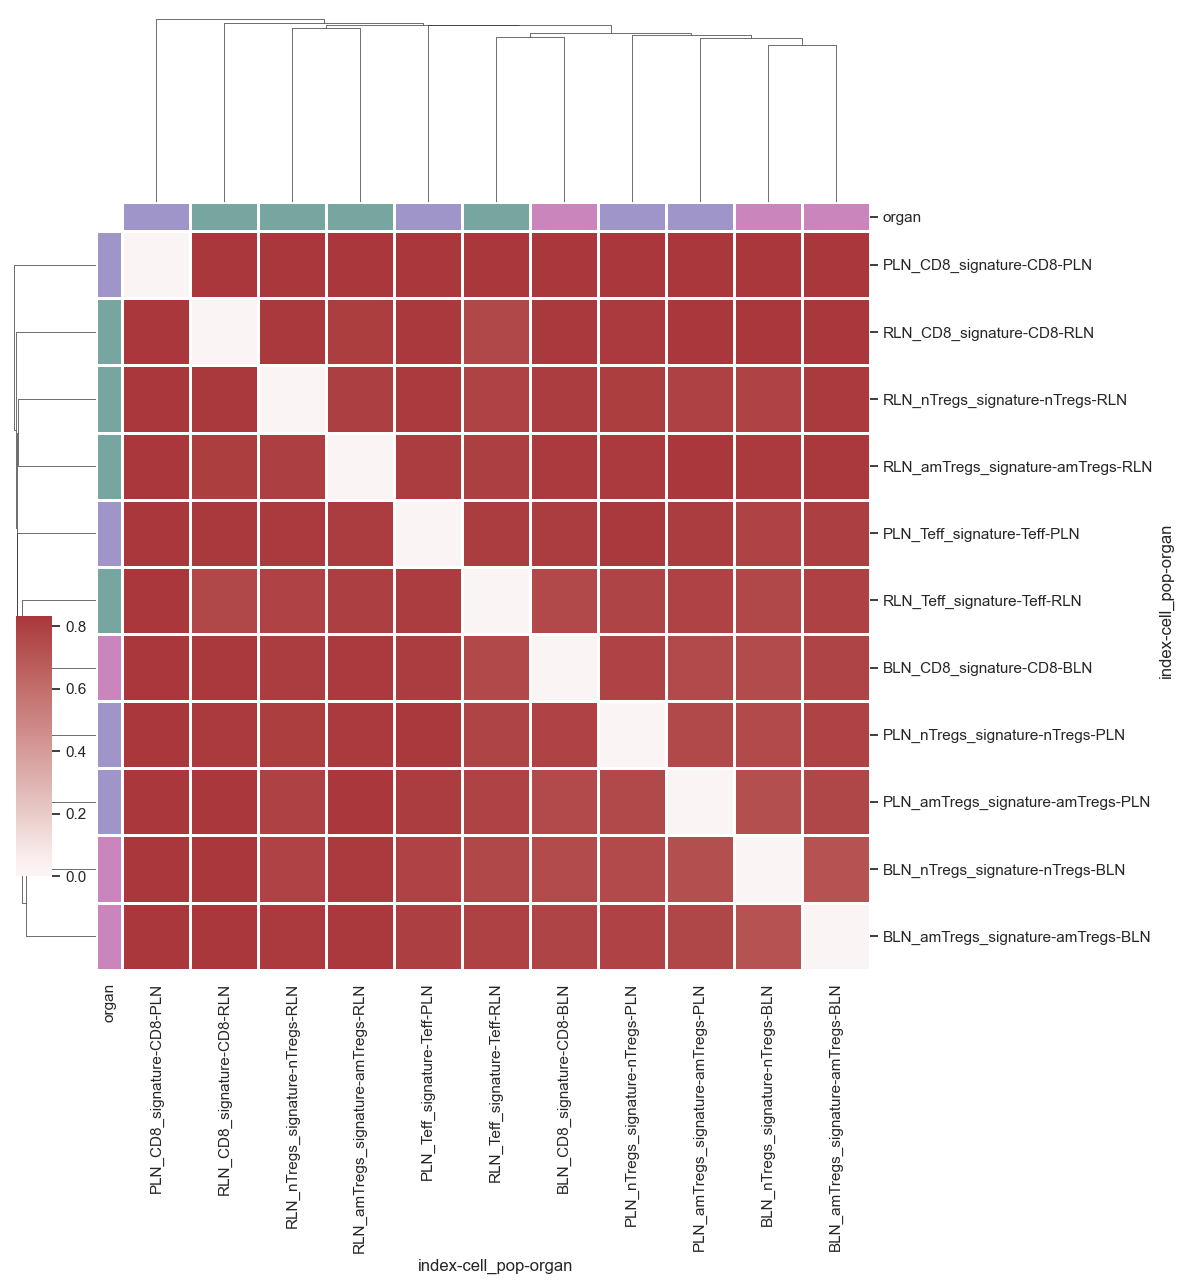

In [84]:
g = sns.clustermap(js_df, center=0, cmap="vlag",
                     row_colors=organs_colors, col_colors=organs_colors,
                   dendrogram_ratio=(.1, .2),
                     cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

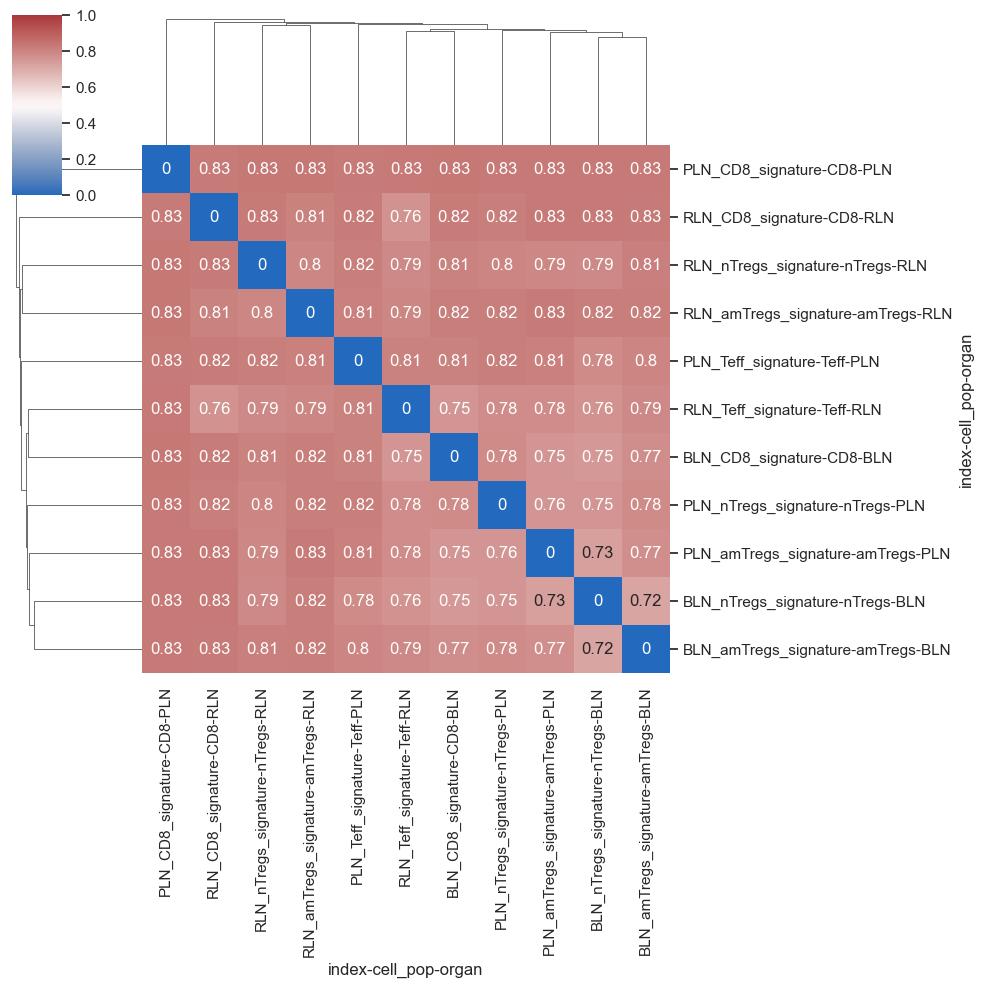

In [85]:
sns.clustermap(js_df, cmap="vlag", vmin=0, vmax=1, annot=True)


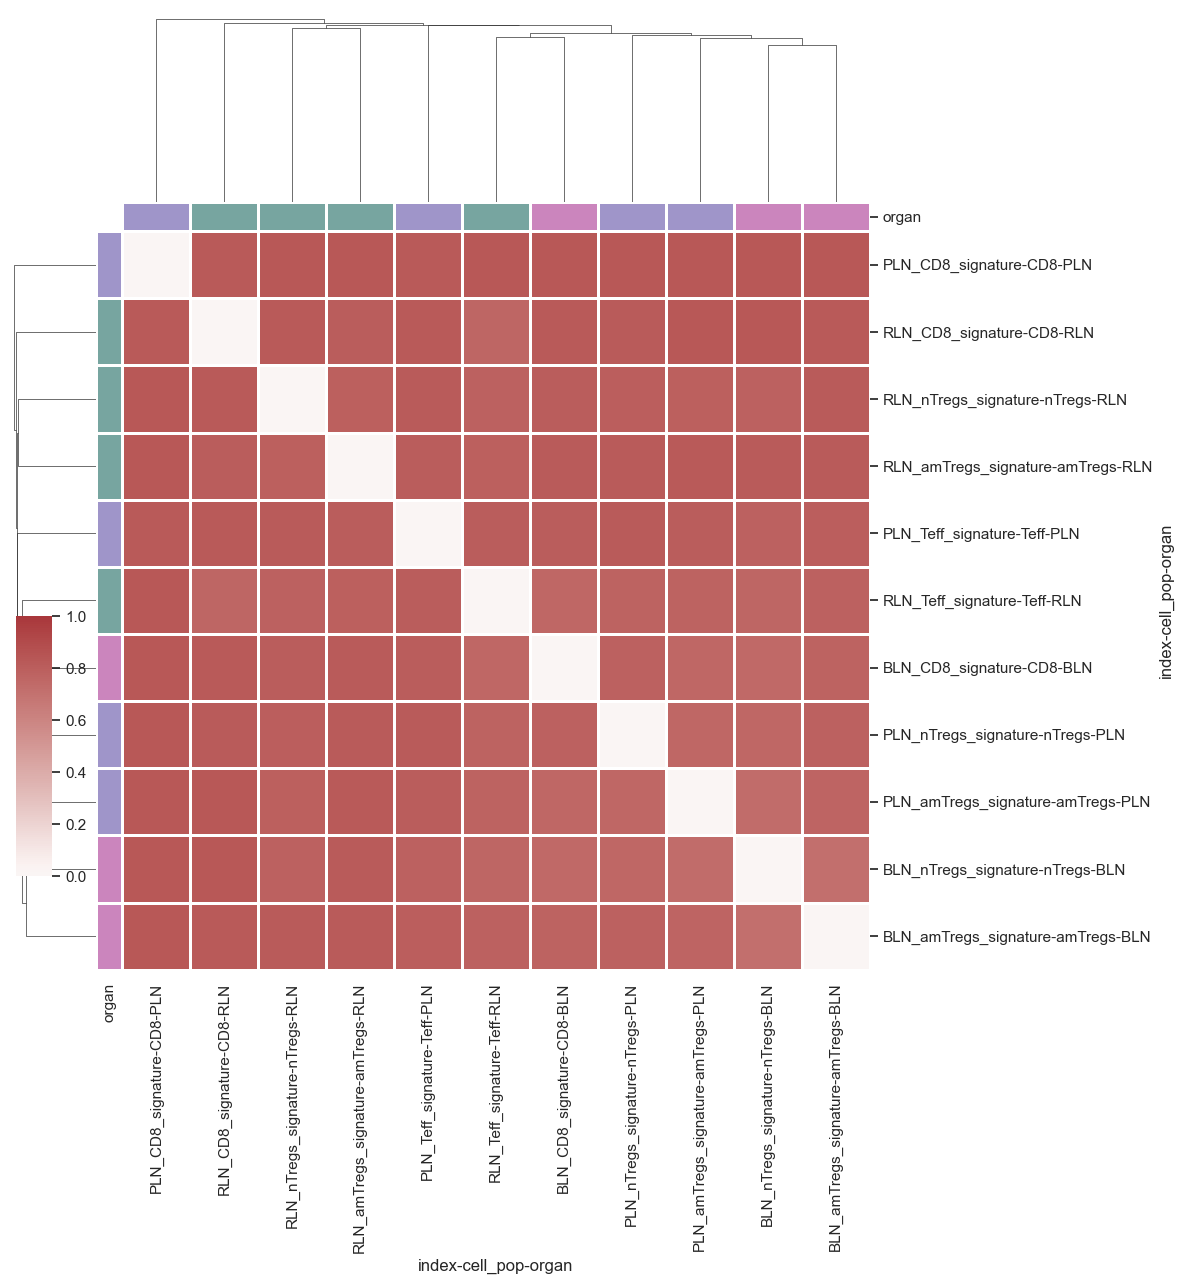

In [86]:
g = sns.clustermap(js_df, center=0, cmap="vlag",
                     row_colors=organs_colors, col_colors=organs_colors,
                   dendrogram_ratio=(.1, .2),
                     cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13),
                    vmin=0, vmax=1)

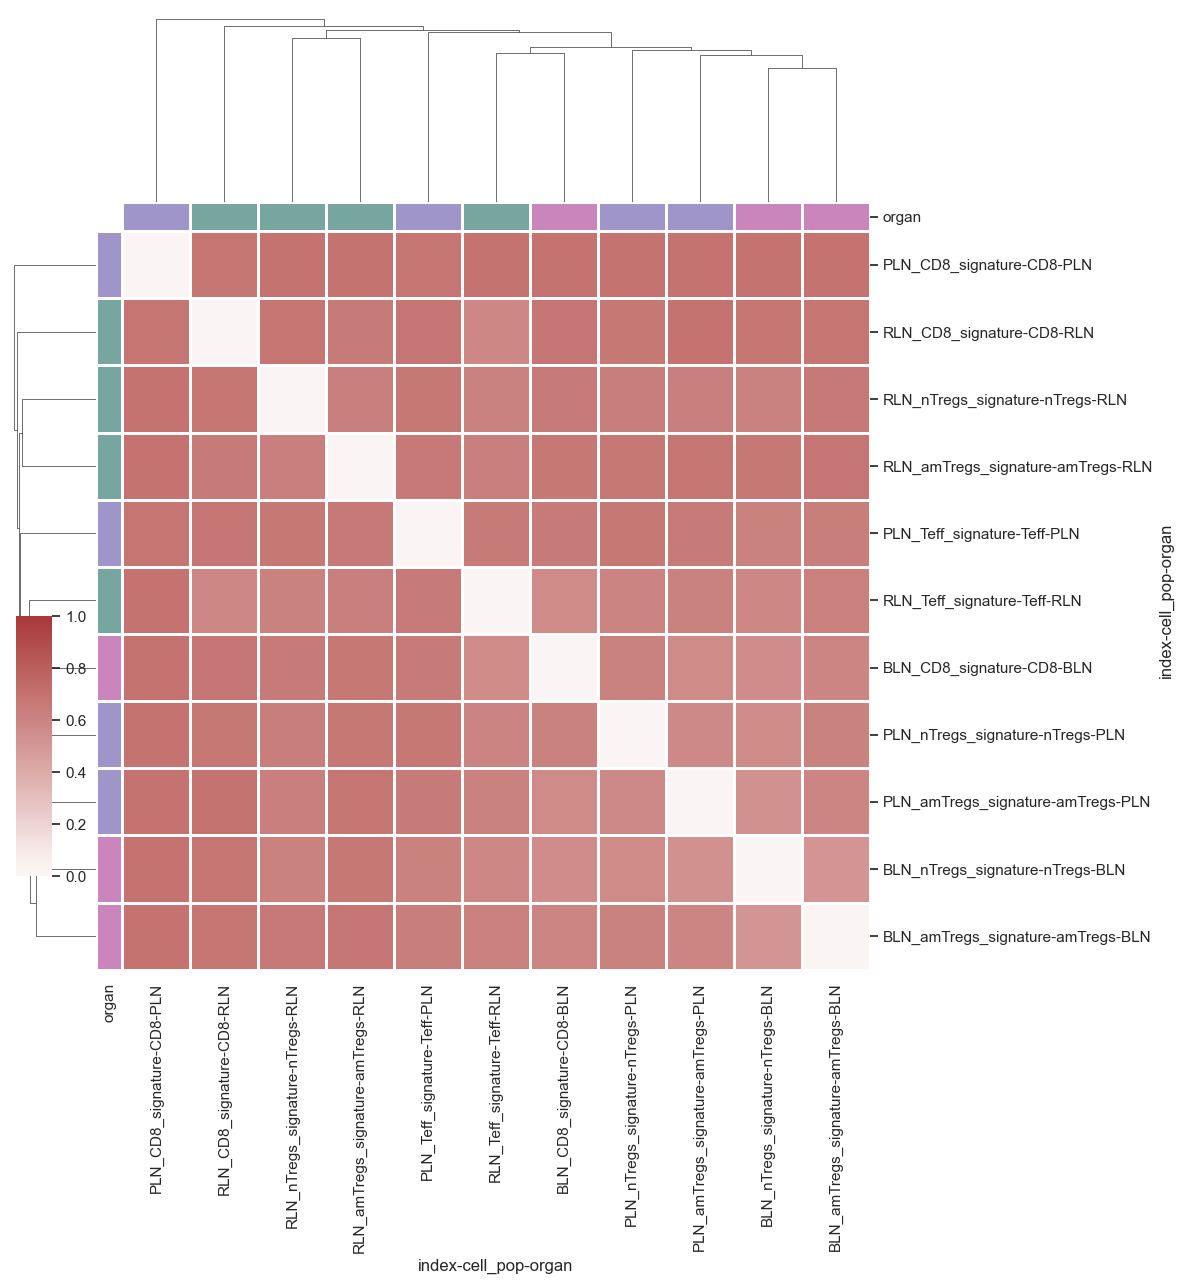

In [87]:
g = sns.clustermap(js_divergence, center=0, cmap="vlag",
                     row_colors=organs_colors, col_colors=organs_colors,
                   dendrogram_ratio=(.1, .2),
                     cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13),
                    vmin=0, vmax=1)

In [88]:
g.ax_row_dendrogram.remove()

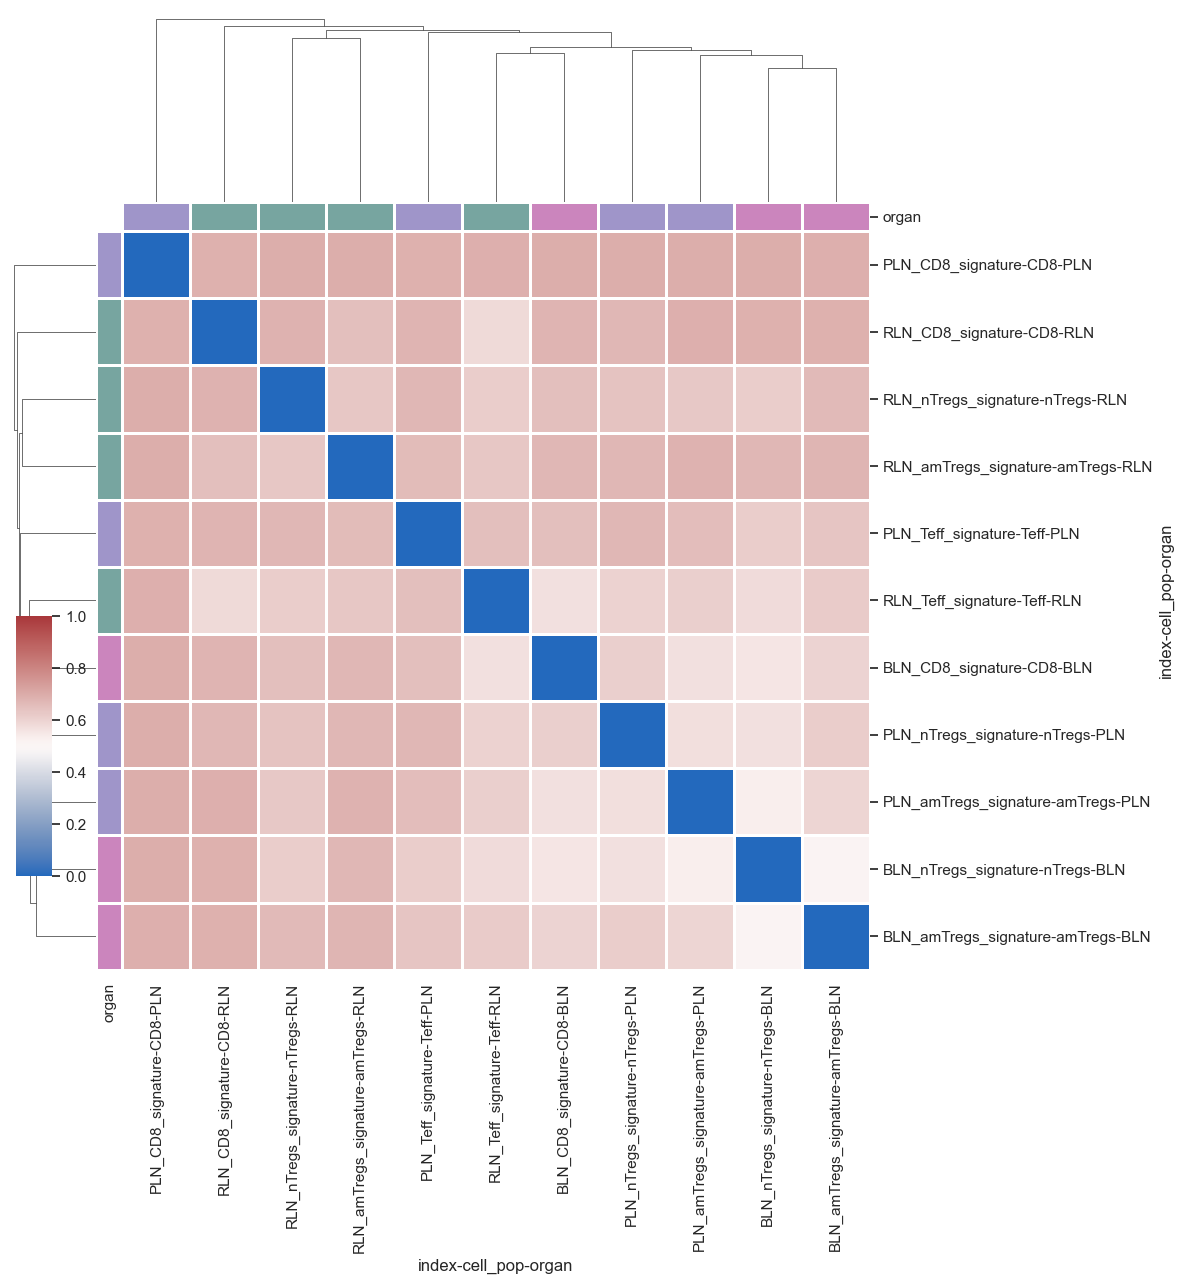

In [89]:
g = sns.clustermap(js_divergence, cmap="vlag",
                     row_colors=organs_colors, col_colors=organs_colors,
                   dendrogram_ratio=(.1, .2),
                     cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13),
                    vmin=0, vmax=1)

In [90]:
wasserstein_distance_val = np.array([[wasserstein_distance(value1, value2) for value1 in data_dict.values()]
                        for value2 in data_dict.values()])
wasserstein_distance_df = pd.DataFrame(wasserstein_distance_val, index=names, columns=names)


In [91]:
wasserstein_distance_df

BLN_nTregs_signature  RLN_nTregs_signature  \
BLN_nTregs_signature               0.000000              0.006805   
RLN_nTregs_signature               0.006805              0.000000   
PLN_amTregs_signature              0.000731              0.007364   
RLN_Teff_signature                 0.001203              0.005722   
RLN_CD8_signature                  0.010182              0.013766   
PLN_Teff_signature                 0.004695              0.009982   
PLN_nTregs_signature               0.001280              0.008017   
BLN_amTregs_signature              0.001402              0.007506   
PLN_CD8_signature                  0.036010              0.029567   
RLN_amTregs_signature              0.005845              0.010161   
BLN_CD8_signature                  0.000796              0.007055   

                       PLN_amTregs_signature  RLN_Teff_signature  \
BLN_nTregs_signature                0.000731            0.001203   
RLN_nTregs_signature                0.007364            0.005722   
PLN_amTregs_signature               0.000000            0.001765   
RLN_Teff_signature                  0.001765            0.000000   
RLN_CD8_signature                   0.010498            0.010476   
PLN_Teff_signature                  0.004857            0.005385   
PLN_nTregs_signature                0.000692            0.002437   
BLN_amTregs_signature               0.001319            0.002269   
PLN_CD8_signature                   0.036526            0.035212   
RLN_amTregs_signature               0.006112            0.006113   
BLN_CD8_signature                   0.000854            0.001524   

                       RLN_CD8_signature  PLN_Teff_signature  \
BLN_nTregs_signature            0.010182            0.004695   
RLN_nTregs_signature            0.013766            0.009982   
PLN_amTregs_signature           0.010498            0.004857   
RLN_Teff_signature              0.010476            0.005385   
RLN_CD8_signature               0.000000            0.006029   
PLN_Teff_signature              0.006029            0.000000   
PLN_nTregs_signature            0.010179            0.004596   
BLN_amTregs_signature           0.009661            0.003913   
PLN_CD8_signature               0.036295            0.035675   
RLN_amTregs_signature           0.004646            0.002390   
BLN_CD8_signature               0.010154            0.004442   

                       PLN_nTregs_signature  BLN_amTregs_signature  \
BLN_nTregs_signature               0.001280               0.001402   
RLN_nTregs_signature               0.008017               0.007506   
PLN_amTregs_signature              0.000692               0.001319   
RLN_Teff_signature                 0.002437               0.002269   
RLN_CD8_signature                  0.010179               0.009661   
PLN_Teff_signature                 0.004596               0.003913   
PLN_nTregs_signature               0.000000               0.001137   
BLN_amTregs_signature              0.001137               0.000000   
PLN_CD8_signature                  0.036842               0.036155   
RLN_amTregs_signature              0.006405               0.005679   
BLN_CD8_signature                  0.001079               0.000988   

                       PLN_CD8_signature  RLN_amTregs_signature  \
BLN_nTregs_signature            0.036010               0.005845   
RLN_nTregs_signature            0.029567               0.010161   
PLN_amTregs_signature           0.036526               0.006112   
RLN_Teff_signature              0.035212               0.006113   
RLN_CD8_signature               0.036295               0.004646   
PLN_Teff_signature              0.035675               0.002390   
PLN_nTregs_signature            0.036842               0.006405   
BLN_amTregs_signature           0.036155               0.005679   
PLN_CD8_signature               0.000000               0.034597   
RLN_amTregs_signature           0.034597               0.000000   
BLN_CD8_signature             

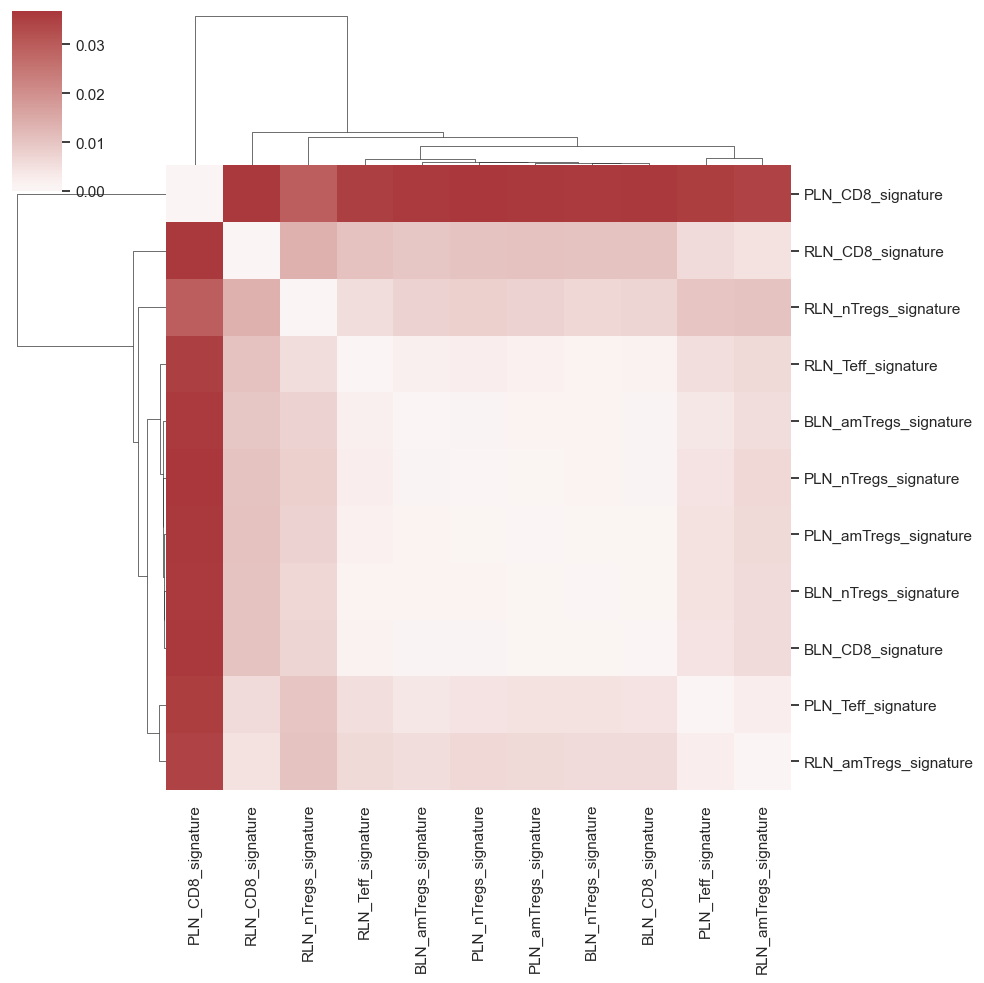

In [92]:
g = sns.clustermap(wasserstein_distance_df, center=0, cmap="vlag",
                     )

In [99]:
npy_files_all = glob.glob("/Users/celinebalaa/Desktop/thesis/tmp/gliph_signature_downsampled/data/results_p_infer/*/*.npy")

In [101]:
# Load each .npy file
npy_all = {}
for file in npy_files_all:
    npy_all[file] = np.load(file)
    

In [102]:
names_all = [os.path.basename(file).split('_p_infer.npy')[0] for file in npy_files_all]

In [103]:
wasserstein_distance_val_all = np.array([[wasserstein_distance(value1, value2) for value1 in npy_all.values()]
                        for value2 in npy_all.values()])
wasserstein_distance_df_all = pd.DataFrame(wasserstein_distance_val_all, index=names_all, columns=names_all)


In [106]:
metadata_all = pd.DataFrame(names_all, columns=['sample'])

In [107]:
metadata_all['tissue'] = metadata_all['sample'].apply(lambda x: x.split("_")[0])
metadata_all['cell_pop'] = metadata_all['sample'].apply(lambda x: x.split("_")[1])
metadata_all['condition'] = metadata_all['sample'].apply(lambda x: x.split("_")[2])

In [111]:
multi_index_all = pd.MultiIndex.from_arrays([metadata_all.index, metadata_all['cell_pop'], metadata_all['tissue'], metadata_all['condition']], names=['index', 'cell_pop', 'tissue', 'condition'])

In [121]:
wasserstein_distance_df_all.columns = multi_index_all
wasserstein_distance_df_all.index = multi_index_all

In [126]:
tissue_color_palette = dict(zip(metadata_all['tissue'].unique(), sns.color_palette("husl", len(metadata_all['tissue'].unique()))))
tissue_colors = pd.Series(metadata_all['tissue'], index=metadata_all.index).map(tissue_color_palette)

In [127]:
tissue_colors

0     (0.9677975592919913, 0.44127456009157356, 0.53...
1     (0.3126890019504329, 0.6928754610296064, 0.192...
2     (0.23299120924703914, 0.639586552066035, 0.926...
3     (0.3126890019504329, 0.6928754610296064, 0.192...
4     (0.3126890019504329, 0.6928754610296064, 0.192...
5     (0.23299120924703914, 0.639586552066035, 0.926...
6     (0.23299120924703914, 0.639586552066035, 0.926...
7     (0.9677975592919913, 0.44127456009157356, 0.53...
8     (0.23299120924703914, 0.639586552066035, 0.926...
9     (0.3126890019504329, 0.6928754610296064, 0.192...
10    (0.9677975592919913, 0.44127456009157356, 0.53...
11    (0.23299120924703914, 0.639586552066035, 0.926...
12    (0.23299120924703914, 0.639586552066035, 0.926...
13    (0.23299120924703914, 0.639586552066035, 0.926...
14    (0.9677975592919913, 0.44127456009157356, 0.53...
15    (0.3126890019504329, 0.6928754610296064, 0.192...
16    (0.23299120924703914, 0.639586552066035, 0.926...
17    (0.9677975592919913, 0.44127456009157356, 

In [128]:
# Create a categorical palette to identify the samples
pal = sns.husl_palette(8, s=.45)
lut = dict(zip(map(str, metadata_all['tissue']), pal))
# Convert the palette to vectors that will be drawn on the side of the matrix
tissues = wasserstein_distance_df_all.columns.get_level_values("tissue")
tissue_colors = pd.Series(tissues, index=wasserstein_distance_df_all.columns).map(lut)


In [140]:
# Create a categorical palette to identify the samples
pal = sns.husl_palette(5, s=.45)
lut = dict(zip(map(str, metadata_all['cell_pop']), pal))
# Convert the palette to vectors that will be drawn on the side of the matrix
cells = wasserstein_distance_df_all.columns.get_level_values("cell_pop")
cell_colors = pd.Series(cells, index=wasserstein_distance_df_all.columns).map(lut)


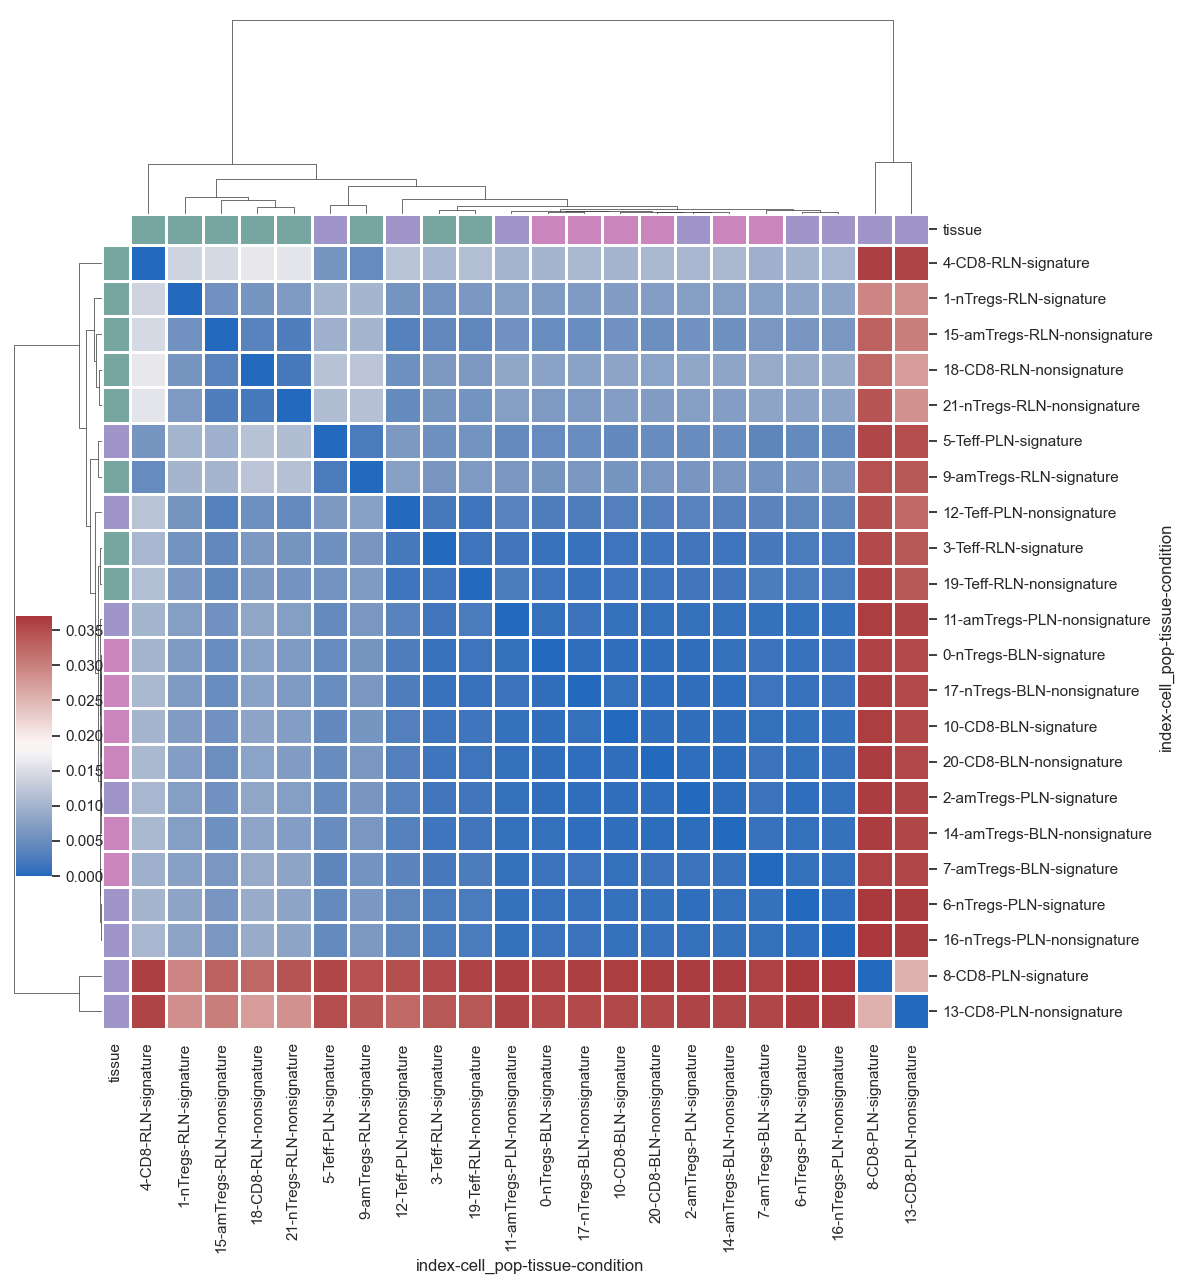

In [131]:
g = sns.clustermap(wasserstein_distance_df_all, cmap="vlag",
                     row_colors=tissue_colors, col_colors=tissue_colors,
                   dendrogram_ratio=(.1, .2),
                     cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13),
                    )

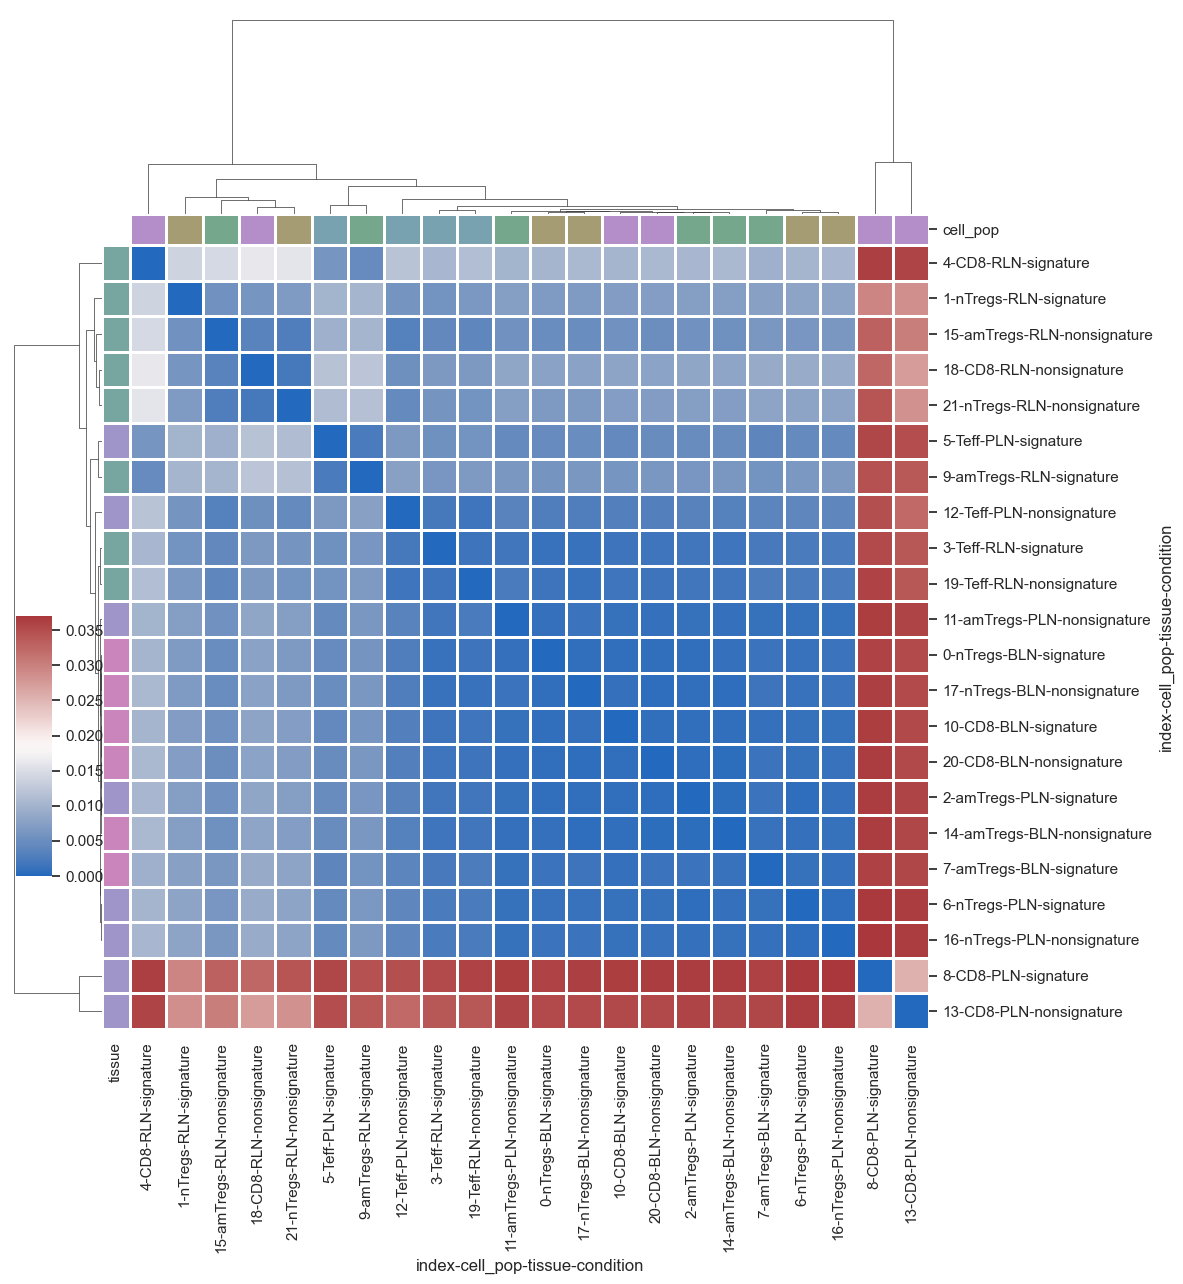

In [141]:
g = sns.clustermap(wasserstein_distance_df_all, cmap="vlag",
                    row_colors=tissue_colors, col_colors=cell_colors,
                   dendrogram_ratio=(.1, .2),
                    cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13),
                    )

In [148]:
import seaborn as sns
import pandas as pd

# Assuming metadata_all is a DataFrame with columns 'cell_pop', 'tissue', and 'sample_type'
# Create a categorical palette for each column
pal_cell_pop = sns.husl_palette(metadata_all['cell_pop'].nunique(), s=.45)
pal_tissue = sns.husl_palette(metadata_all['tissue'].nunique(), s=.45)
pal_sample_type = sns.husl_palette(metadata_all['condition'].nunique(), s=.45)

# Create lookup tables (lut) for each column
lut_cell_pop = dict(zip(metadata_all['cell_pop'].astype(str).unique(), pal_cell_pop))
lut_tissue = dict(zip(metadata_all['tissue'].astype(str).unique(), pal_tissue))
lut_sample_type = dict(zip(metadata_all['condition'].astype(str).unique(), pal_sample_type))

# Map the colors to the data
cell_pop_colors = metadata_all['cell_pop'].astype(str).map(lut_cell_pop)
tissue_colors = metadata_all['tissue'].astype(str).map(lut_tissue)
sample_type_colors = metadata_all['condition'].astype(str).map(lut_sample_type)

# Combine the colors into a DataFrame
row_colors = pd.DataFrame({
    'Cell Population': cell_pop_colors,
    'Tissue Type': tissue_colors,
    'Condition': sample_type_colors
})


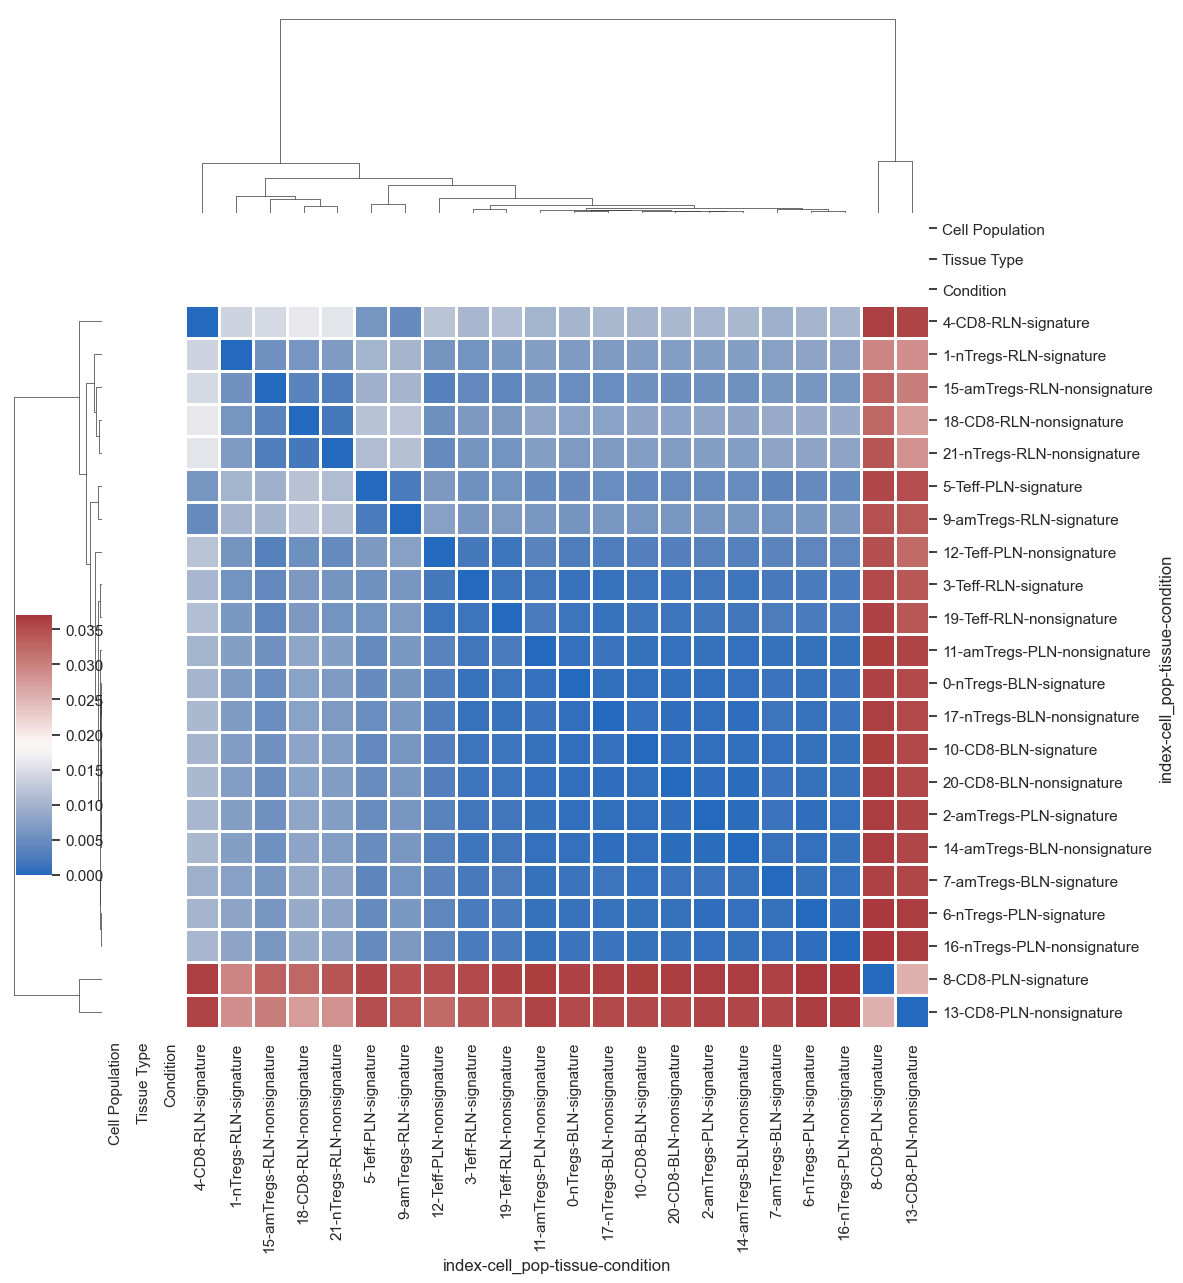

In [149]:
sns.clustermap(wasserstein_distance_df_all, cmap="vlag",
                   row_colors=row_colors, col_colors=row_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))


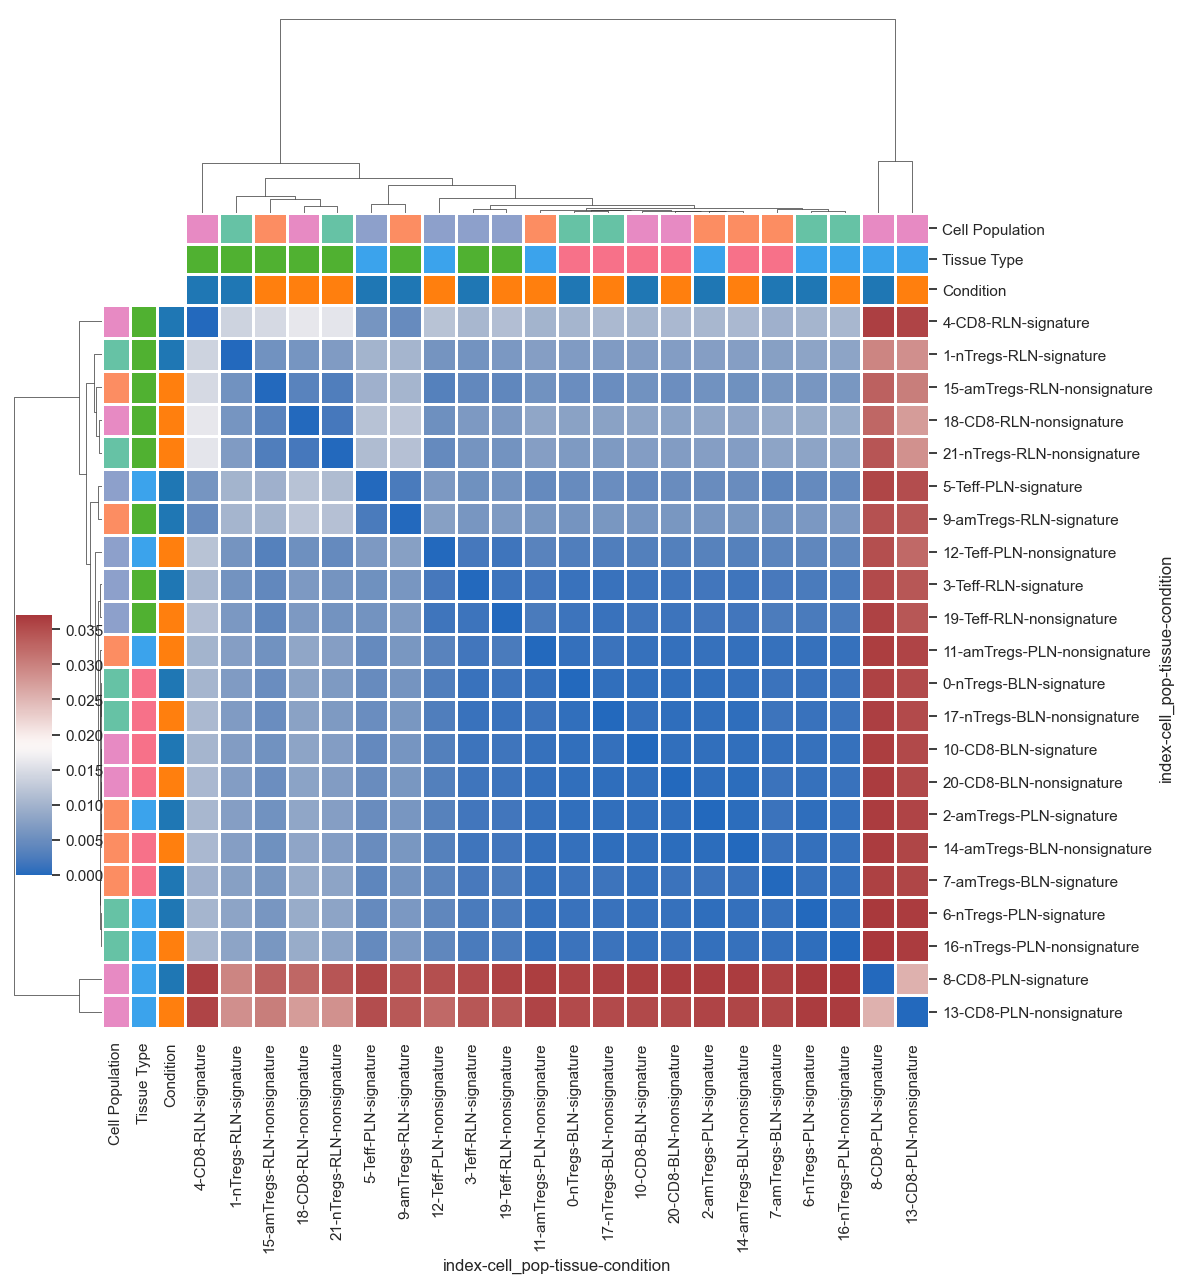

In [152]:
import seaborn as sns
import pandas as pd
import numpy as np

# Example 'metadata_all' DataFrame with columns 'cell_pop', 'tissue', 'condition'
# Ensure metadata_all has the same number of rows as wasserstein_distance_df_all
# metadata_all = pd.DataFrame(...) # Load or define this data

# Assuming wasserstein_distance_df_all is your distance matrix DataFrame
# Ensure wasserstein_distance_df_all is square and matches the metadata in size

# Create distinct palettes for each variable to avoid color repetition
pal_cell_pop = sns.color_palette("Set2", n_colors=metadata_all['cell_pop'].nunique())
pal_tissue = sns.color_palette("husl", n_colors=metadata_all['tissue'].nunique())
pal_condition = sns.color_palette("tab10", n_colors=metadata_all['condition'].nunique())

# Create lookup tables (lut) for mapping colors to categories
lut_cell_pop = dict(zip(metadata_all['cell_pop'].astype(str).unique(), pal_cell_pop))
lut_tissue = dict(zip(metadata_all['tissue'].astype(str).unique(), pal_tissue))
lut_condition = dict(zip(metadata_all['condition'].astype(str).unique(), pal_condition))

# Map colors to the metadata categories
cell_pop_colors = metadata_all['cell_pop'].astype(str).map(lut_cell_pop)
tissue_colors = metadata_all['tissue'].astype(str).map(lut_tissue)
condition_colors = metadata_all['condition'].astype(str).map(lut_condition)

# Combine colors into a DataFrame for row/column coloring
row_colors = pd.DataFrame({
    'Cell Population': cell_pop_colors,
    'Tissue Type': tissue_colors,
    'Condition': condition_colors
})

# Ensure that the row_colors DataFrame is indexed the same as the distance matrix
row_colors = row_colors.set_index(wasserstein_distance_df_all.index)

# Plot the clustermap
sns.clustermap(wasserstein_distance_df_all, cmap="vlag",
               row_colors=row_colors, col_colors=row_colors,
               dendrogram_ratio=(.1, .2),
               cbar_pos=(.02, .32, .03, .2),
               linewidths=.75, figsize=(12, 13))


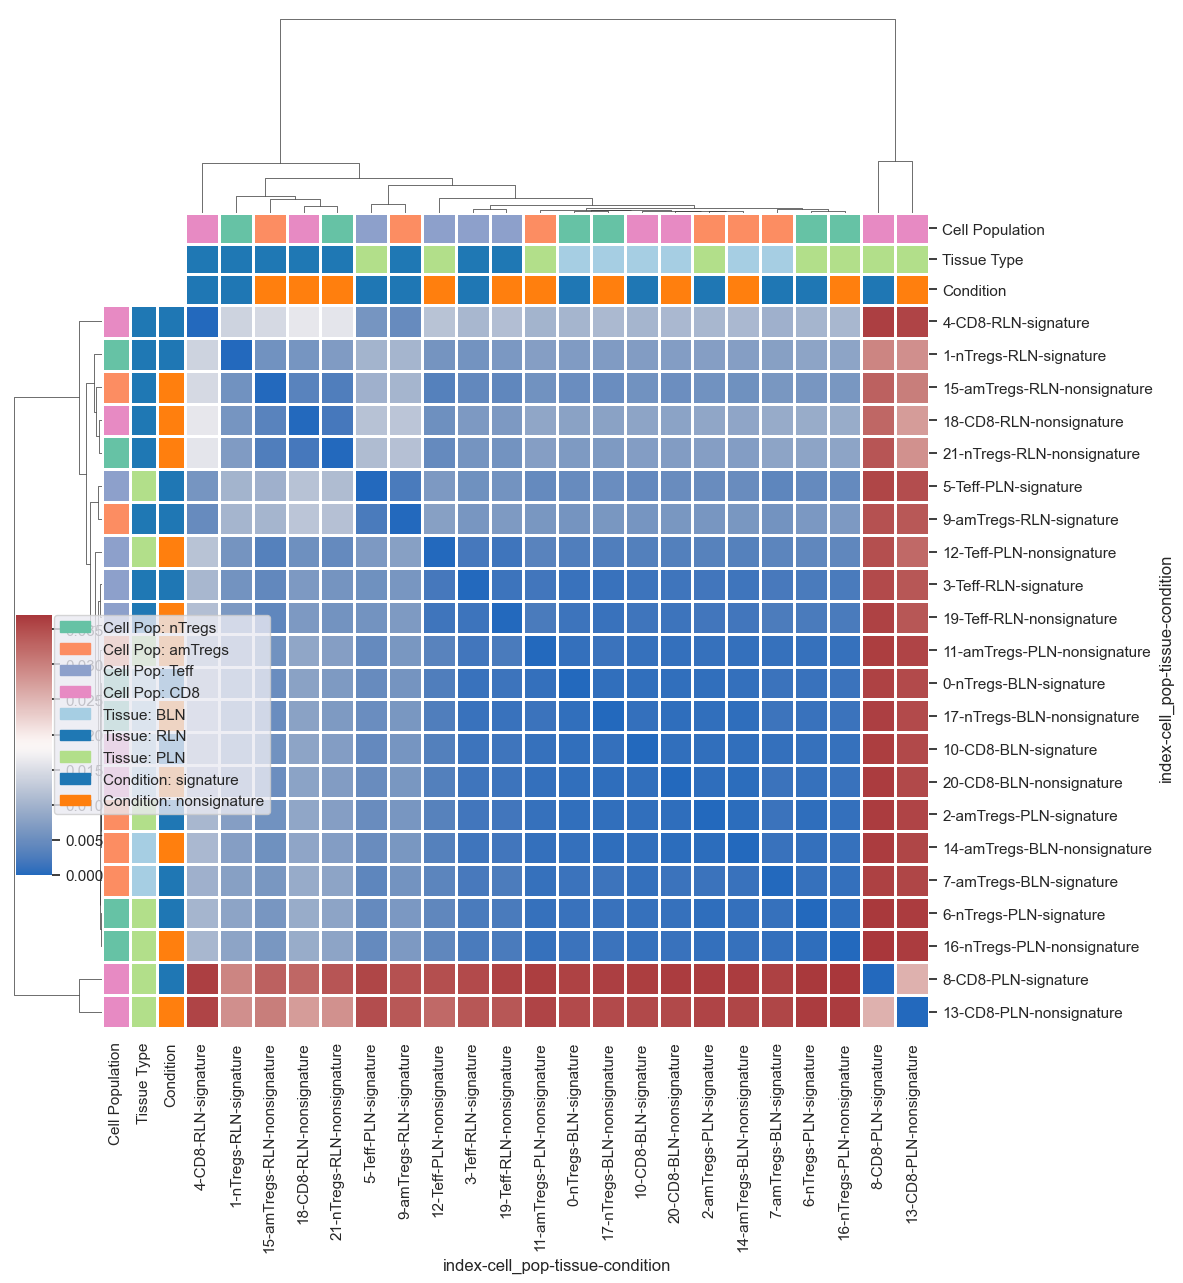

In [155]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Example 'metadata_all' DataFrame with columns 'cell_pop', 'tissue', 'condition'
# Ensure metadata_all has the same number of rows as wasserstein_distance_df_all

# Create distinct palettes for each variable to avoid color repetition
pal_cell_pop = sns.color_palette("Set2", n_colors=metadata_all['cell_pop'].nunique())
pal_tissue = sns.color_palette("Paired", n_colors=metadata_all['tissue'].nunique())
pal_condition = sns.color_palette("tab10", n_colors=metadata_all['condition'].nunique())

# Create lookup tables (lut) for mapping colors to categories
lut_cell_pop = dict(zip(metadata_all['cell_pop'].astype(str).unique(), pal_cell_pop))
lut_tissue = dict(zip(metadata_all['tissue'].astype(str).unique(), pal_tissue))
lut_condition = dict(zip(metadata_all['condition'].astype(str).unique(), pal_condition))

# Map colors to the metadata categories
cell_pop_colors = metadata_all['cell_pop'].astype(str).map(lut_cell_pop)
tissue_colors = metadata_all['tissue'].astype(str).map(lut_tissue)
condition_colors = metadata_all['condition'].astype(str).map(lut_condition)

# Combine colors into a DataFrame for row/column coloring
row_colors = pd.DataFrame({
    'Cell Population': cell_pop_colors,
    'Tissue Type': tissue_colors,
    'Condition': condition_colors
})

# Ensure that the row_colors DataFrame is indexed the same as the distance matrix
row_colors = row_colors.set_index(wasserstein_distance_df_all.index)

# Plot the clustermap
g = sns.clustermap(wasserstein_distance_df_all, cmap="vlag",
                   row_colors=row_colors, col_colors=row_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

# Create the legends
legend_patches = []

# Cell Population Legend
for label, color in lut_cell_pop.items():
    legend_patches.append(Patch(color=color, label=f'Cell Pop: {label}'))

# Tissue Legend
for label, color in lut_tissue.items():
    legend_patches.append(Patch(color=color, label=f'Tissue: {label}'))

# Condition Legend
for label, color in lut_condition.items():
    legend_patches.append(Patch(color=color, label=f'Condition: {label}'))

# Plot the legend outside the plot
plt.legend(handles=legend_patches, bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()


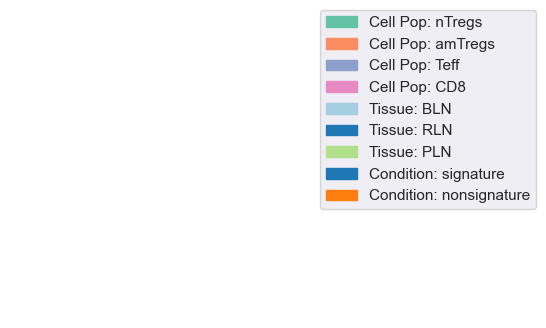

In [156]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Create the legends
legend_patches = []

# Cell Population Legend
for label, color in lut_cell_pop.items():
    legend_patches.append(Patch(color=color, label=f'Cell Pop: {label}'))

# Tissue Legend
for label, color in lut_tissue.items():
    legend_patches.append(Patch(color=color, label=f'Tissue: {label}'))

# Condition Legend
for label, color in lut_condition.items():
    legend_patches.append(Patch(color=color, label=f'Condition: {label}'))

# Create a blank figure for the legend
plt.figure(figsize=(4, 4))

# Plot the legend outside the plot
plt.legend(handles=legend_patches, bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.)
plt.axis('off')  # Turn off the axes, as we just want the legend
plt.show()


In [157]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Example 'metadata_all' DataFrame with columns 'cell_pop', 'tissue', 'condition'
# Ensure metadata_all has the same number of rows as wasserstein_distance_df_all

# Create distinct palettes for each variable to avoid color repetition
pal_cell_pop = sns.color_palette("Set2", n_colors=metadata_all['cell_pop'].nunique())
pal_tissue = sns.color_palette("Paired", n_colors=metadata_all['tissue'].nunique())
pal_condition = sns.color_palette("tab10", n_colors=metadata_all['condition'].nunique())

# Create lookup tables (lut) for mapping colors to categories
lut_cell_pop = dict(zip(metadata_all['cell_pop'].astype(str).unique(), pal_cell_pop))
lut_tissue = dict(zip(metadata_all['tissue'].astype(str).unique(), pal_tissue))
lut_condition = dict(zip(metadata_all['condition'].astype(str).unique(), pal_condition))

# Map colors to the metadata categories
cell_pop_colors = metadata_all['cell_pop'].astype(str).map(lut_cell_pop)
tissue_colors = metadata_all['tissue'].astype(str).map(lut_tissue)
condition_colors = metadata_all['condition'].astype(str).map(lut_condition)

# Combine colors into a DataFrame for row/column coloring
row_colors = pd.DataFrame({
    'Cell Population': cell_pop_colors,
    'Tissue Type': tissue_colors,
    'Condition': condition_colors
})

# Ensure that the row_colors DataFrame is indexed the same as the distance matrix
row_colors = row_colors.set_index(wasserstein_distance_df_all.index)


In [203]:
lut_cell_pop = {'amTregs': '#F19CBB', #CCCCFF
                'nTregs': '#c95b83',  #d3bbbf #DE6FA1
                'Teff': '#FFBF00',
                'CD8': '#ff8c55'}  #ffb07c #ef6e4e #d98586 #ee7733

lut_tissue = {'PLN': '#B0BF1A', #74C365
              'RLN': '#7CB9E8', #A4DDED
              'BLN': '#B284BE' #8B72BE 
              } 

lut_condition = {'signature': '#9a8d98',
                'nonsignature': '#dbdbdc'}

In [204]:

# Map colors to the metadata categories
cell_pop_colors = metadata_all['cell_pop'].astype(str).map(lut_cell_pop)
tissue_colors = metadata_all['tissue'].astype(str).map(lut_tissue)
condition_colors = metadata_all['condition'].astype(str).map(lut_condition)

# Combine colors into a DataFrame for row/column coloring
row_colors = pd.DataFrame({
    'Cell Population': cell_pop_colors,
    'Tissue Type': tissue_colors,
    'Condition': condition_colors
})

# Ensure that the row_colors DataFrame is indexed the same as the distance matrix
row_colors = row_colors.set_index(wasserstein_distance_df_all.index)


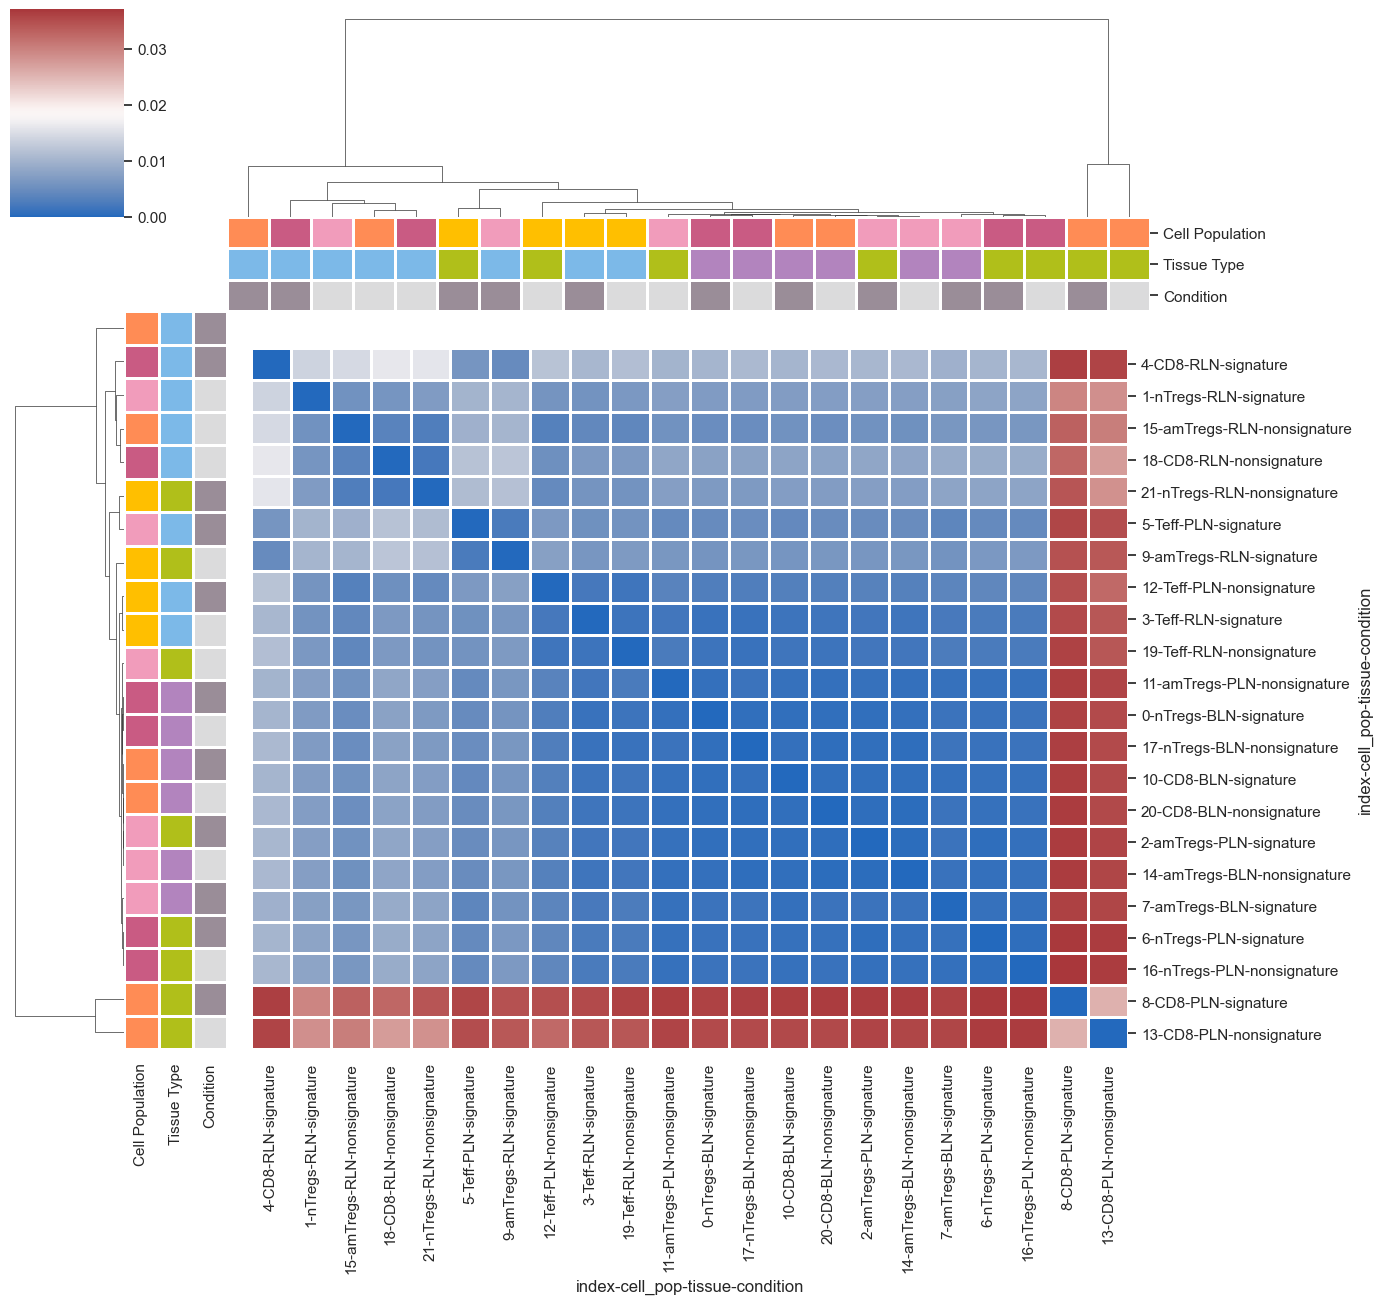

In [205]:
# Plot the clustermap
g = sns.clustermap(wasserstein_distance_df_all, cmap="vlag",
                   row_colors=row_colors, col_colors=row_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

# Add padding between the heatmap and the color bars
g.fig.subplots_adjust(left=0.05, right=1, top=0.9, bottom=0.1)

# Adjust the position of the heatmap to add space between row_colors and the heatmap
heatmap_pos = g.ax_heatmap.get_position()
# g.ax_heatmap.set_position([heatmap_pos.x0, heatmap_pos.y0, heatmap_pos.width, heatmap_pos.height * 0.95])
g.ax_heatmap.set_position([heatmap_pos.x0 + 0.02, heatmap_pos.y0, heatmap_pos.width * 0.95, heatmap_pos.height * 0.95])

# Show the plot
plt.show()

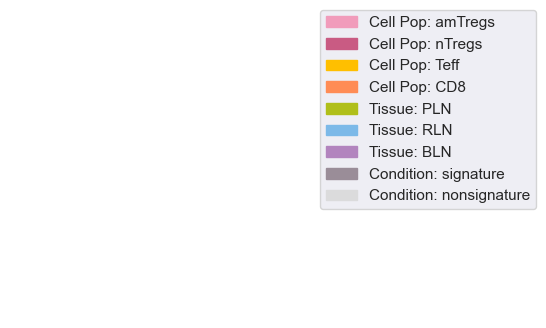

In [206]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

# Create the legends
legend_patches = []

# Cell Population Legend
for label, color in lut_cell_pop.items():
    legend_patches.append(Patch(color=color, label=f'Cell Pop: {label}'))

# Tissue Legend
for label, color in lut_tissue.items():
    legend_patches.append(Patch(color=color, label=f'Tissue: {label}'))

# Condition Legend
for label, color in lut_condition.items():
    legend_patches.append(Patch(color=color, label=f'Condition: {label}'))

# Create a blank figure for the legend
plt.figure(figsize=(4, 4))

# Plot the legend outside the plot
plt.legend(handles=legend_patches, bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.)
plt.axis('off')  # Turn off the axes, as we just want the legend
plt.show()


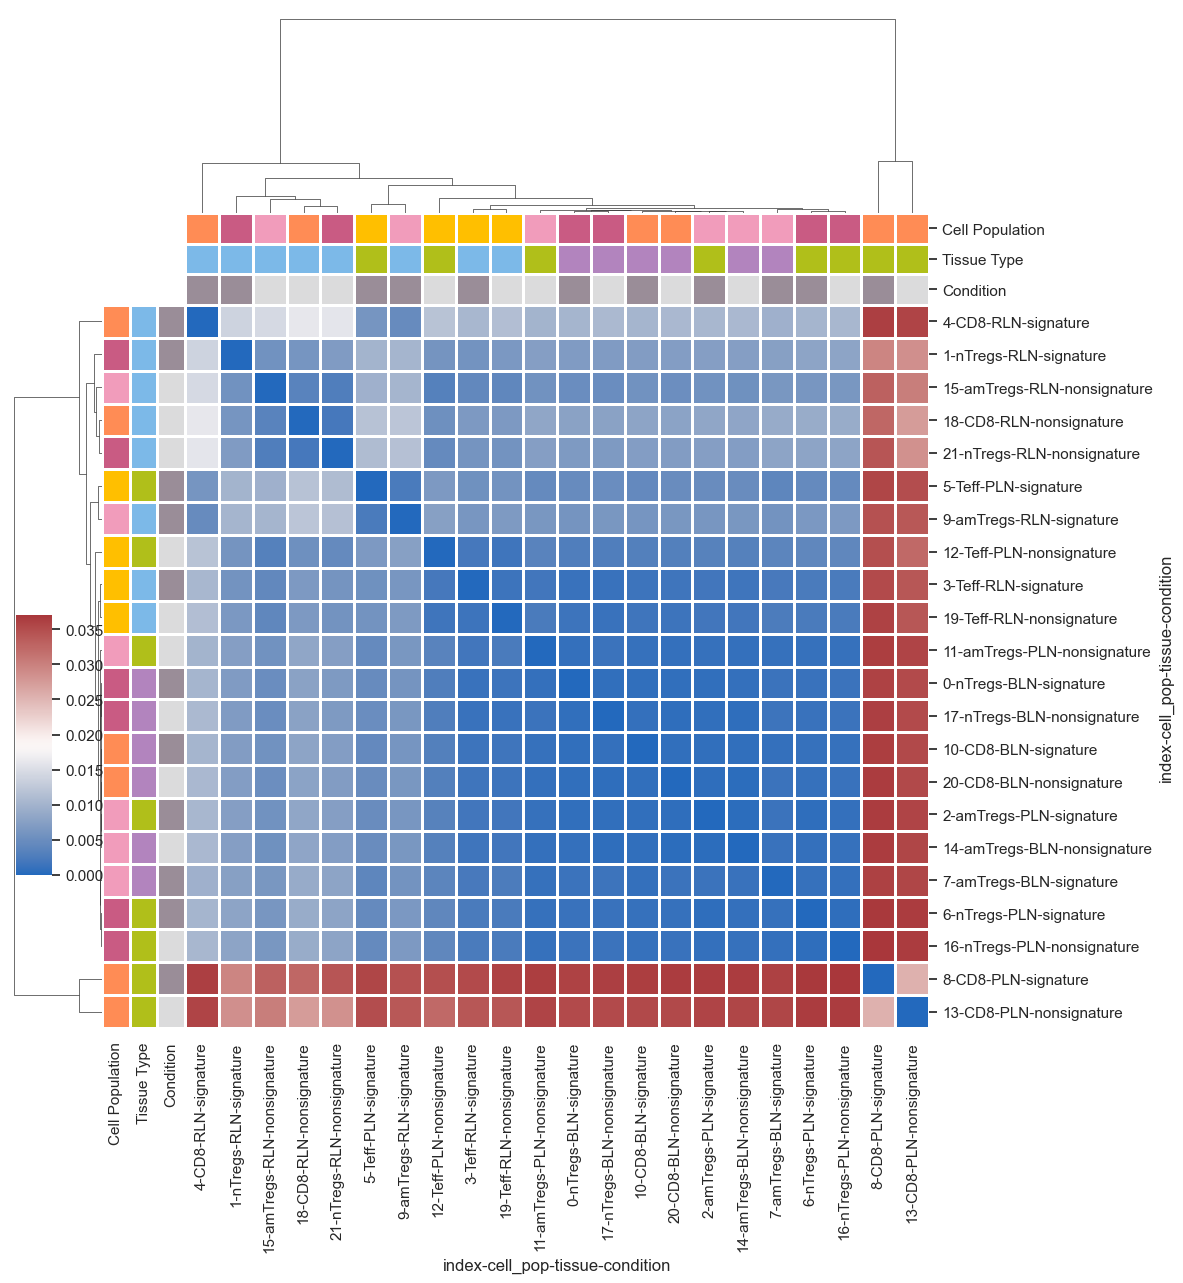

In [207]:
sns.clustermap(wasserstein_distance_df_all, cmap="vlag",
                   row_colors=row_colors, col_colors=row_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

In [212]:
# I want to test my results so randomly shuffle the data and see if the results are still the same
# I will shuffle the data 100 times and calculate the mean and standard deviation of the wasserstein_distance
# I will then compare the original wasserstein_distance to the mean and standard deviation of the shuffled data

for i in range(100):
    shuffled_data = {key: np.random.permutation(value) for key, value in npy_all.items()}
    wasserstein_distance_val_shuffled = np.array([[wasserstein_distance(value1, value2) for value1 in shuffled_data.values()]
                        for value2 in shuffled_data.values()])
    wasserstein_distance_df_shuffled = pd.DataFrame(wasserstein_distance_val_shuffled, index=names_all, columns=names_all)
    if i == 0:
        wasserstein_distance_df_shuffled_all = wasserstein_distance_df_shuffled
    else:
        wasserstein_distance_df_shuffled_all = pd.concat([wasserstein_distance_df_shuffled_all, wasserstein_distance_df_shuffled])


In [220]:
shuffled_data = {key: np.random.permutation(value) for key, value in npy_all.items()}

In [215]:
mean_wd_shuffled = wasserstein_distance_df_shuffled_all.groupby(wasserstein_distance_df_shuffled_all.index).mean()

In [223]:
import numpy as np
from scipy.stats import wasserstein_distance

def bootstrap_wasserstein(P, Q, n_bootstrap=1000):
    distances = []
    n = len(P)
    for _ in range(n_bootstrap):
        idx = np.random.choice(np.arange(n), size=n, replace=True)
        dist = wasserstein_distance(P[idx], Q[idx])
        distances.append(dist)
    return np.mean(distances), np.percentile(distances, [2.5, 97.5])

# Example distributions
P = np.array([0.2, 0.5, 0.3])
Q = np.array([0.1, 0.6, 0.3])

# Bootstrap Wasserstein Distance
mean_dist, conf_interval = bootstrap_wasserstein(P, Q)
print(f"Mean Distance: {mean_dist}, 95% CI: {conf_interval}")


Mean Distance: 0.06479999999999998, 95% CI: [0.  0.1]


In [224]:
def permutation_test_wasserstein(P, Q, n_permutations=1000):
    original_dist = wasserstein_distance(P, Q)
    combined = np.concatenate([P, Q])
    permuted_distances = []

    for _ in range(n_permutations):
        np.random.shuffle(combined)
        P_perm = combined[:len(P)]
        Q_perm = combined[len(P):]
        permuted_distances.append(wasserstein_distance(P_perm, Q_perm))

    permuted_distances = np.array(permuted_distances)
    p_value = np.mean(permuted_distances >= original_dist)
    return original_dist, p_value

# Example distributions
P = np.array([0.2, 0.5, 0.3])
Q = np.array([0.1, 0.6, 0.3])

# Perform permutation test
dist, p_value = permutation_test_wasserstein(P, Q)
print(f"Wasserstein Distance: {dist}, Permutation p-value: {p_value}")


Wasserstein Distance: 0.06666666666666667, Permutation p-value: 1.0


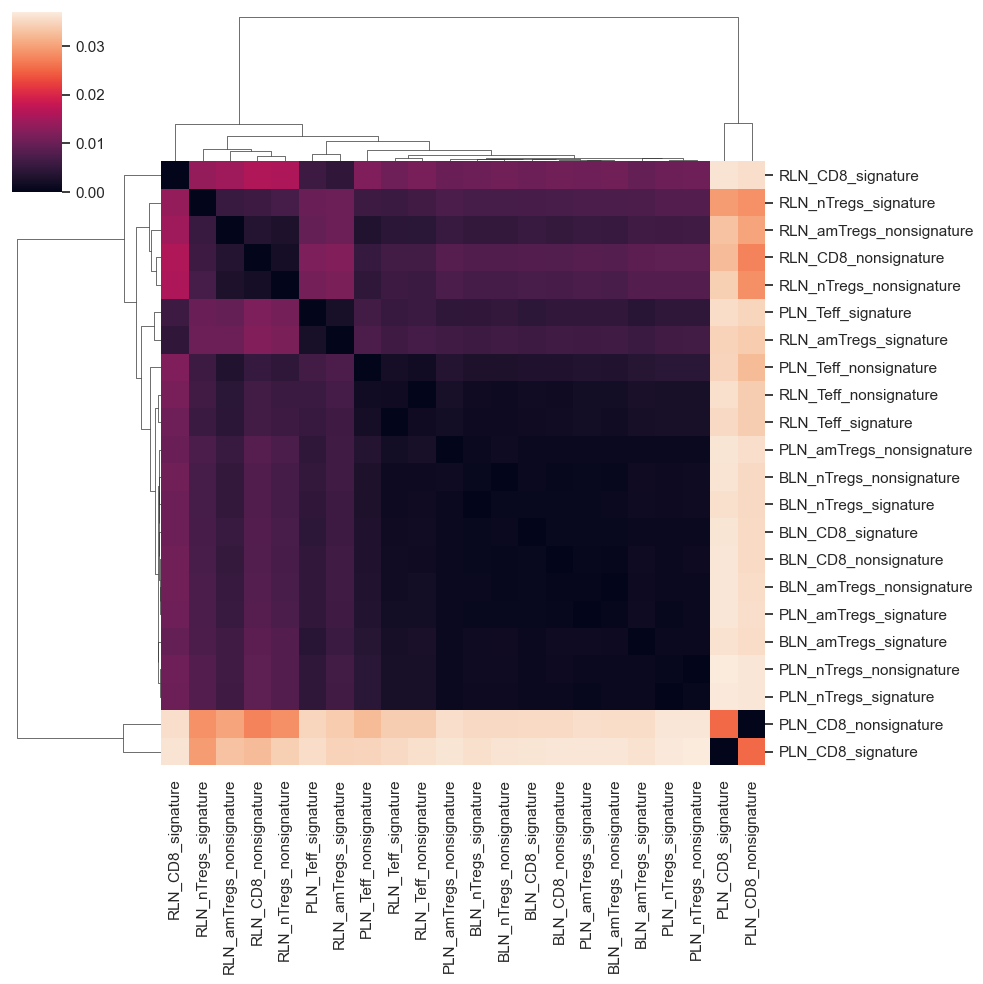

In [219]:
sns.clustermap(mean_wd_shuffled)

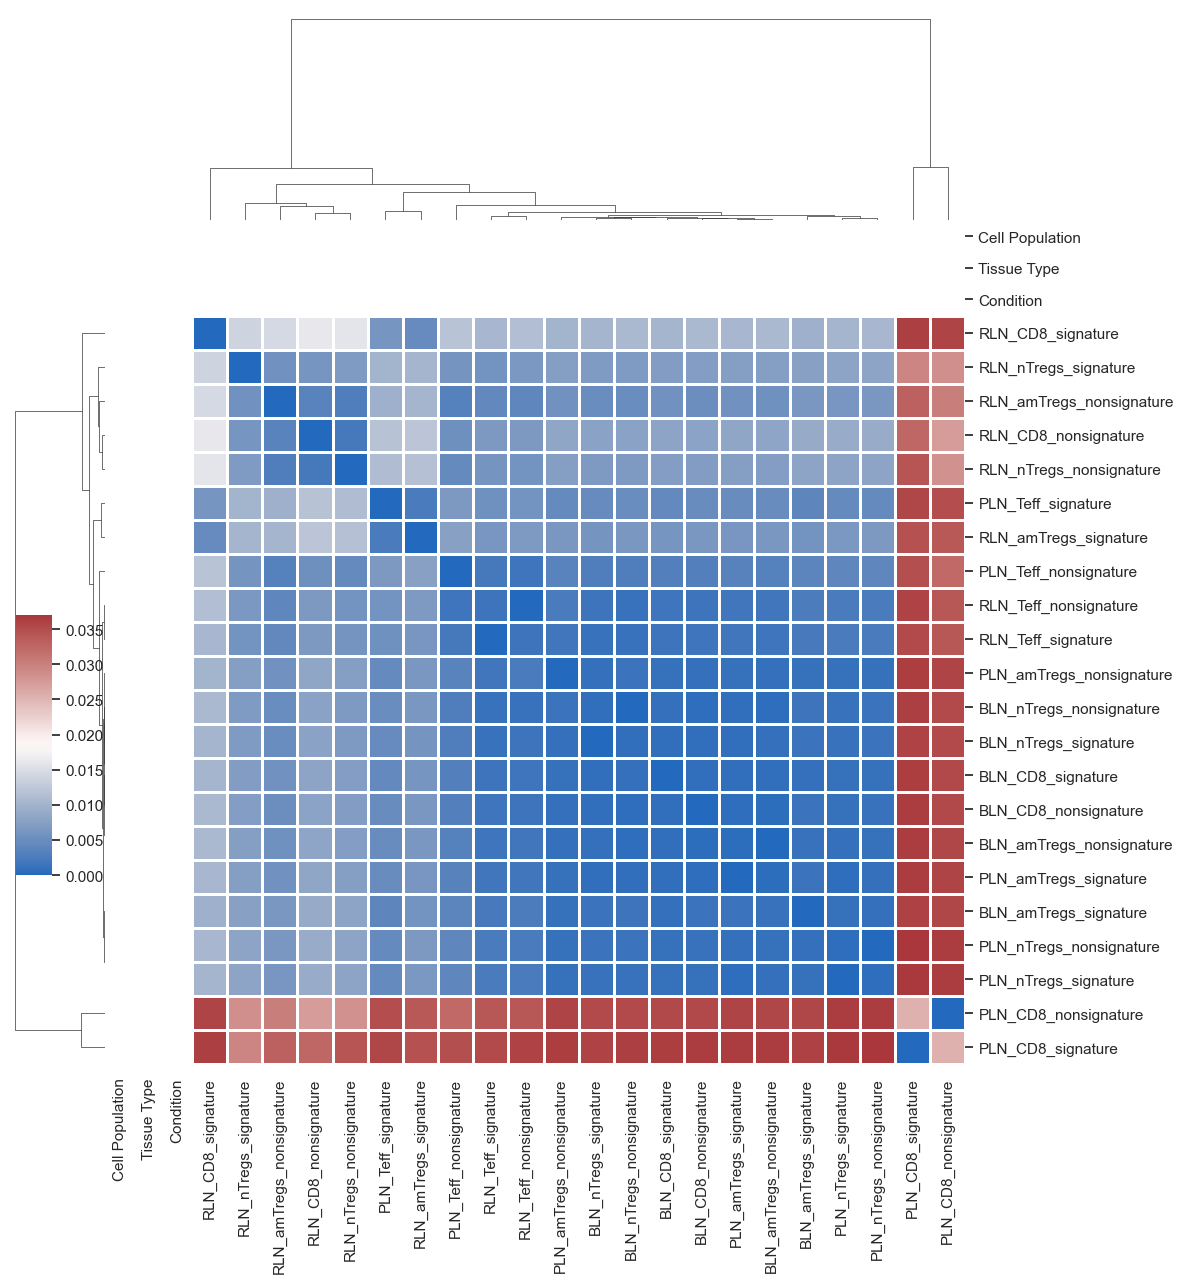

In [216]:
sns.clustermap(mean_wd_shuffled, cmap="vlag",
                   row_colors=row_colors, col_colors=row_colors,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(.02, .32, .03, .2),
                   linewidths=.75, figsize=(12, 13))

In [226]:
import numpy as np
from scipy.stats import wasserstein_distance
from scipy.spatial.distance import jensenshannon

# Example function to apply bootstrapping to calculate distances
def bootstrap_distances(P, Q, dist_func, n_bootstrap=1000):
    distances = []
    n_P = len(P)
    n_Q = len(Q)
    
    for _ in range(n_bootstrap):
        # Sample separately from P and Q to avoid index issues
        idx_P = np.random.choice(np.arange(n_P), size=n_P, replace=True)
        idx_Q = np.random.choice(np.arange(n_Q), size=n_Q, replace=True)
        
        # Calculate distance with the bootstrap samples
        dist = dist_func(P[idx_P], Q[idx_Q])
        distances.append(dist)
    
    return np.mean(distances), np.percentile(distances, [2.5, 97.5])

# Example function to apply permutation testing to calculate distances
def permutation_test_distances(P, Q, dist_func, n_permutations=1000):
    original_dist = dist_func(P, Q)
    combined = np.concatenate([P, Q])
    permuted_distances = []

    for _ in range(n_permutations):
        np.random.shuffle(combined)
        P_perm = combined[:len(P)]
        Q_perm = combined[len(P):]
        permuted_distances.append(dist_func(P_perm, Q_perm))

    p_value = np.mean(np.array(permuted_distances) >= original_dist)
    return original_dist, p_value

# Select a distance function (Wasserstein Distance or Jensen-Shannon Divergence)
def get_wasserstein_distance(P, Q):
    return wasserstein_distance(P, Q)

def get_jsd_distance(P, Q):
    return jensenshannon(P, Q)

# Main loop to apply bootstrapping and permutation tests for each pair of datasets
results = {}

for filename1, data1 in npy_all.items():
    for filename2, data2 in npy_all.items():
        if filename1 != filename2:
            # Bootstrapping for Wasserstein Distance
            mean_dist, ci = bootstrap_distances(data1, data2, get_wasserstein_distance)
            print(f"Bootstrap Wasserstein between {filename1} and {filename2}: Mean = {mean_dist}, 95% CI = {ci}")

            # Permutation Test for Wasserstein Distance
            observed_dist, p_value = permutation_test_distances(data1, data2, get_wasserstein_distance)
            print(f"Permutation Wasserstein between {filename1} and {filename2}: Distance = {observed_dist}, p-value = {p_value}")
            
            # Storing the results
            results[(filename1, filename2)] = {
                'bootstrap_mean_wasserstein': mean_dist,
                'bootstrap_ci_wasserstein': ci,
                'permutation_dist_wasserstein': observed_dist,
                'permutation_p_value_wasserstein': p_value
            }

# Results now contain the distances, CI, and p-values for each pair of datasets.


Bootstrap Wasserstein between /Users/celinebalaa/Desktop/thesis/tmp/gliph_signature_downsampled/data/results_p_infer/signature/BLN_nTregs_signature_p_infer.npy and /Users/celinebalaa/Desktop/thesis/tmp/gliph_signature_downsampled/data/results_p_infer/signature/RLN_nTregs_signature_p_infer.npy: Mean = 0.006994430136044933, 95% CI = [0.001634   0.01606817]
Permutation Wasserstein between /Users/celinebalaa/Desktop/thesis/tmp/gliph_signature_downsampled/data/results_p_infer/signature/BLN_nTregs_signature_p_infer.npy and /Users/celinebalaa/Desktop/thesis/tmp/gliph_signature_downsampled/data/results_p_infer/signature/RLN_nTregs_signature_p_infer.npy: Distance = 0.0068050573761815735, p-value = 0.013
Bootstrap Wasserstein between /Users/celinebalaa/Desktop/thesis/tmp/gliph_signature_downsampled/data/results_p_infer/signature/BLN_nTregs_signature_p_infer.npy and /Users/celinebalaa/Desktop/thesis/tmp/gliph_signature_downsampled/data/results_p_infer/signature/PLN_amTregs_signature_p_infer.npy: 

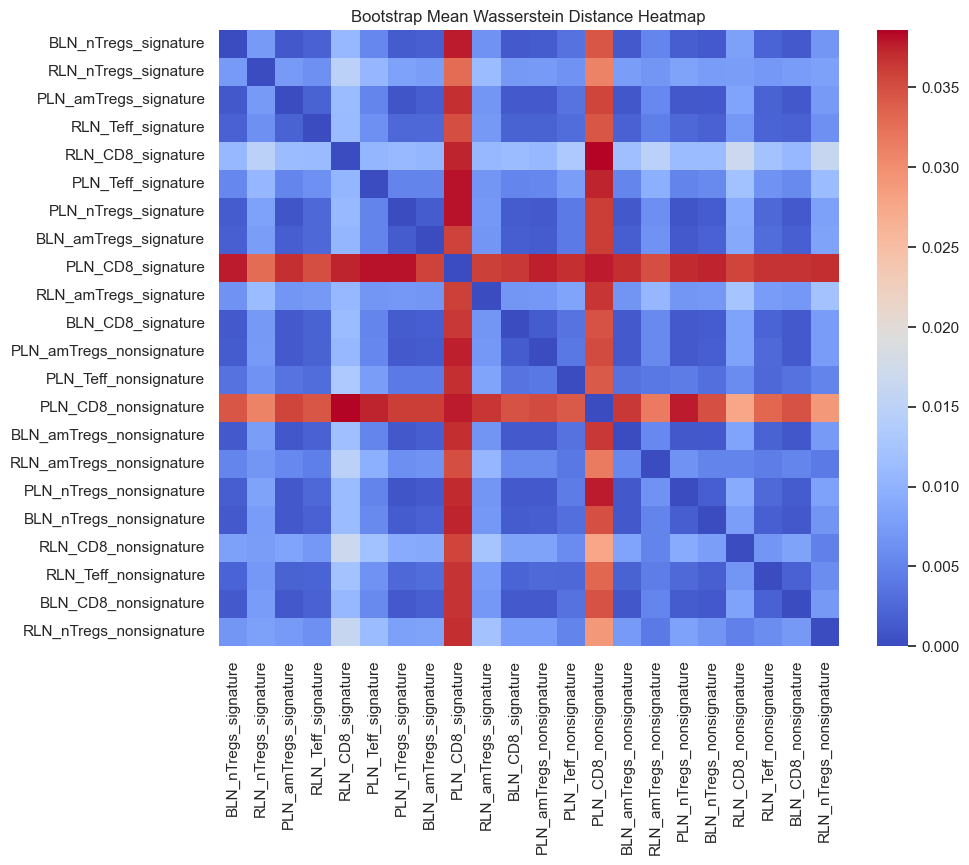

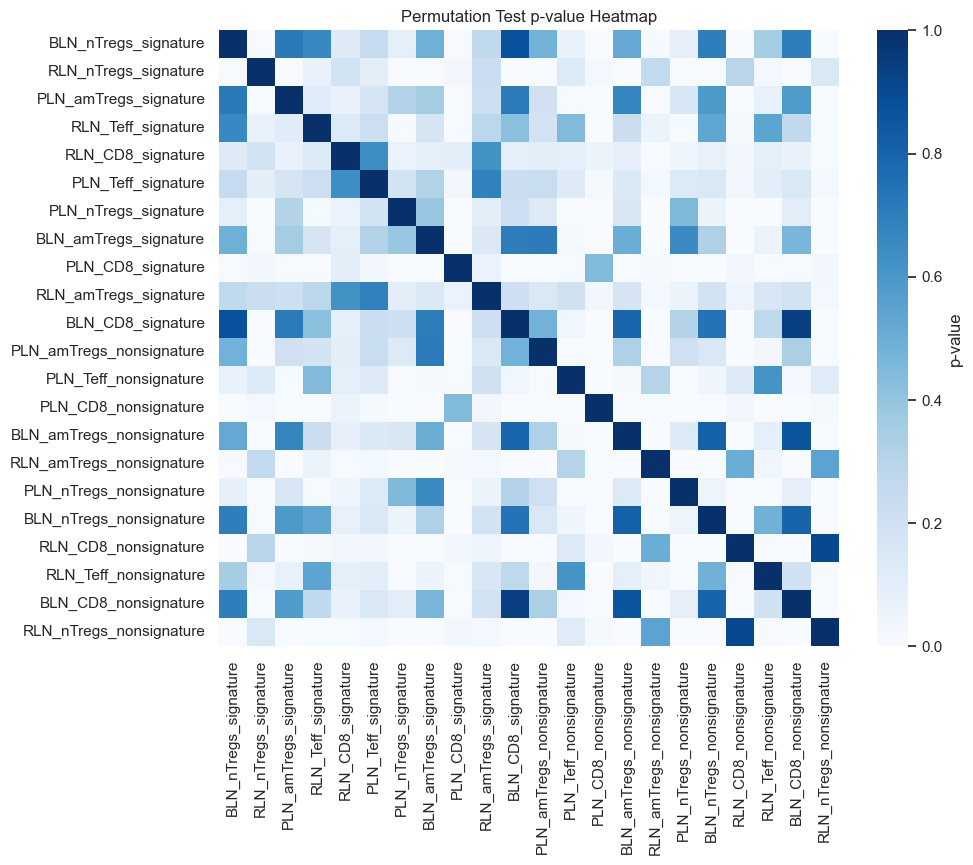

In [230]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'results' is the dictionary storing bootstrap and permutation test results
# Keys are tuples of (filename1, filename2) and values contain distances, p-values, etc.

# Get the list of filenames (unique keys)
filenames = list(npy_all.keys())
n = len(filenames)

filenames_single = [os.path.basename(file).split('_p_infer.npy')[0] for file in npy_files_all]

# Initialize matrices for bootstrap mean distances and permutation p-values
bootstrap_means = np.zeros((n, n))
p_values = np.ones((n, n))  # Start with p-values of 1, meaning "not significant"

# Fill the matrices with the results
for (filename1, filename2), result in results.items():
    i = filenames.index(filename1)
    j = filenames.index(filename2)
    
    # Fill the bootstrap mean distance matrix
    bootstrap_means[i, j] = result['bootstrap_mean_wasserstein']
    bootstrap_means[j, i] = result['bootstrap_mean_wasserstein']  # Symmetric
    
    # Fill the permutation p-value matrix
    p_values[i, j] = result['permutation_p_value_wasserstein']
    p_values[j, i] = result['permutation_p_value_wasserstein']  # Symmetric

# Convert the matrices into Pandas DataFrames for better readability in heatmap
bootstrap_means_df = pd.DataFrame(bootstrap_means, index=filenames_single, columns=filenames_single)
p_values_df = pd.DataFrame(p_values, index=filenames_single, columns=filenames_single)


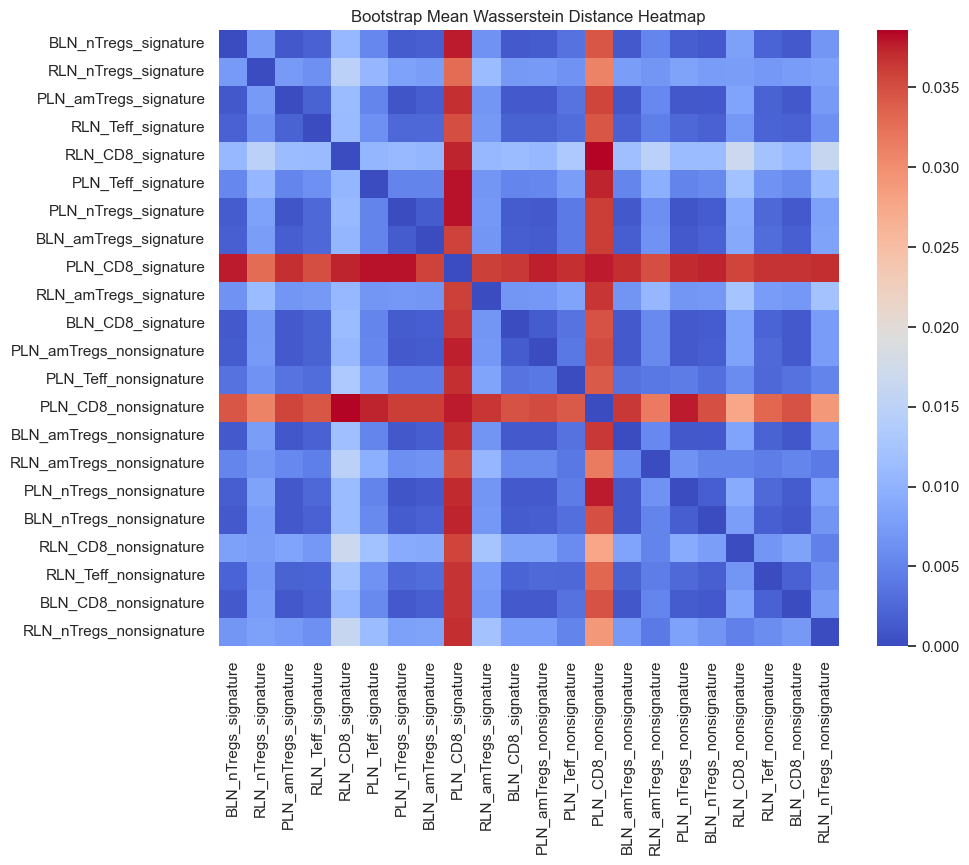

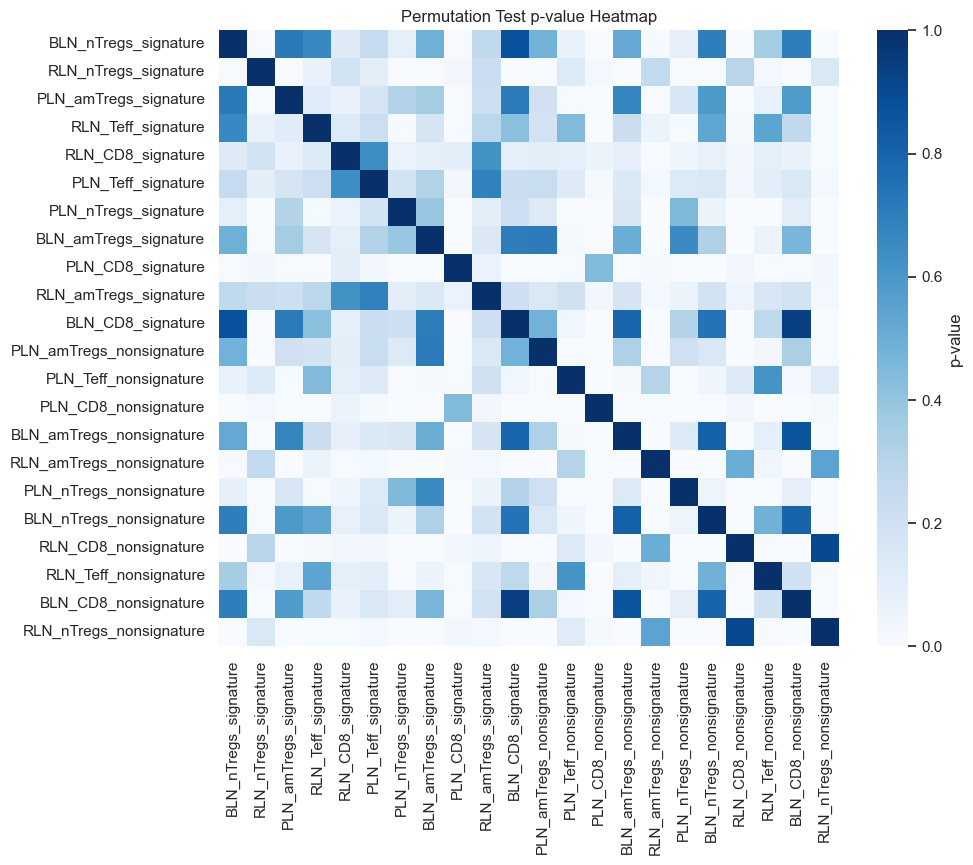

In [232]:

# Plot the bootstrap mean distances heatmap
plt.figure(figsize=(10, 8))
#cmap='vlag'
sns.heatmap(bootstrap_means_df, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Bootstrap Mean Wasserstein Distance Heatmap")
plt.show()

# Plot the permutation test p-values heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(p_values_df, cmap="Blues", annot=False, fmt=".2f", cbar_kws={'label': 'p-value'})
plt.title("Permutation Test p-value Heatmap")
plt.show()


In [247]:
import numpy as np
from scipy.stats import wasserstein_distance

# Function to downsample a dataset to a target size
def downsample_data(data, target_size):
    if len(data) > target_size:
        # Downsample if the dataset is larger than the target size
        return np.random.choice(data, size=target_size, replace=False)
    else:
        # Return original data if it's smaller or equal to the target size
        return data

# Set a target size for downsampling (e.g., minimum size of all datasets)
target_size = min(len(data) for data in npy_all.values())

# Apply downsampling to each dataset in the npy_all dictionary
npy_all_downsampled = {filename: downsample_data(data, target_size) for filename, data in npy_all.items()}

# Now you can calculate distances (e.g., Wasserstein) on the downsampled data
results_downsampled = [[wasserstein_distance(data1, data2) for data1 in npy_all_downsampled.values()] 
                       for data2 in npy_all_downsampled.values()]

results_downsampled_df = pd.DataFrame(results_downsampled, index=filenames_single, columns=filenames_single)

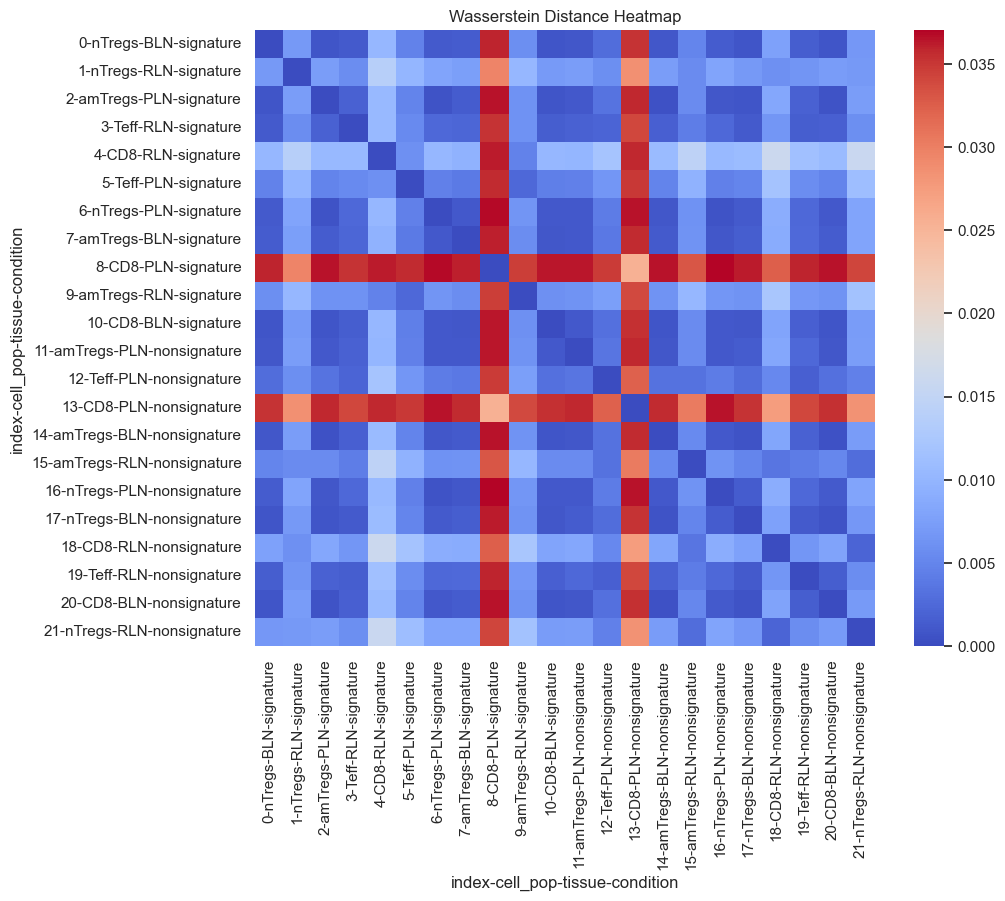

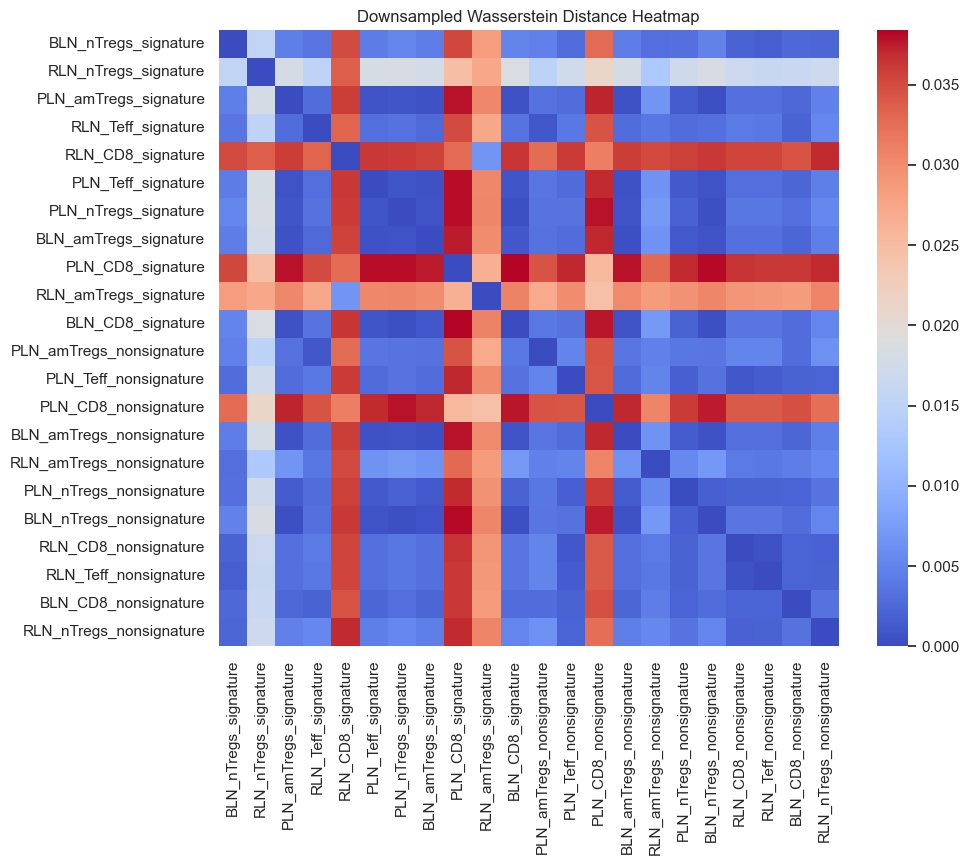

In [249]:
# Plot the bootstrap mean distances heatmap
plt.figure(figsize=(10, 8))
#cmap='vlag'
sns.heatmap(wasserstein_distance_df_all, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Wasserstein Distance Heatmap")
plt.show()

# Plot the bootstrap mean distances heatmap
plt.figure(figsize=(10, 8))
#cmap='vlag'
sns.heatmap(results_downsampled_df, cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Downsampled Wasserstein Distance Heatmap")
plt.show()